Ridwan Darmawan

ridwand117@gmail.com

Sanbercode Data Science Batch 44

#Data

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For rescaling the data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To check most accurate KMeans clustering
from sklearn.metrics import silhouette_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Load dataset
df = pd.read_csv('Data_Negara_HELP.csv')

# Explore data
display(df)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Kematian_anak,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
Ekspor,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
Kesehatan,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
Impor,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
Pendapatan,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
Inflasi,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
Harapan_hidup,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
Jumlah_fertiliti,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
GDPperkapita,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


## Data Cleaning
Cek missing value dan duplikat data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [53]:
# Handling missing values
print(df.isnull().sum())


Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64


Diketahui tidak ada data yang missing dalam dataset tersebut

## Univariate Analysis

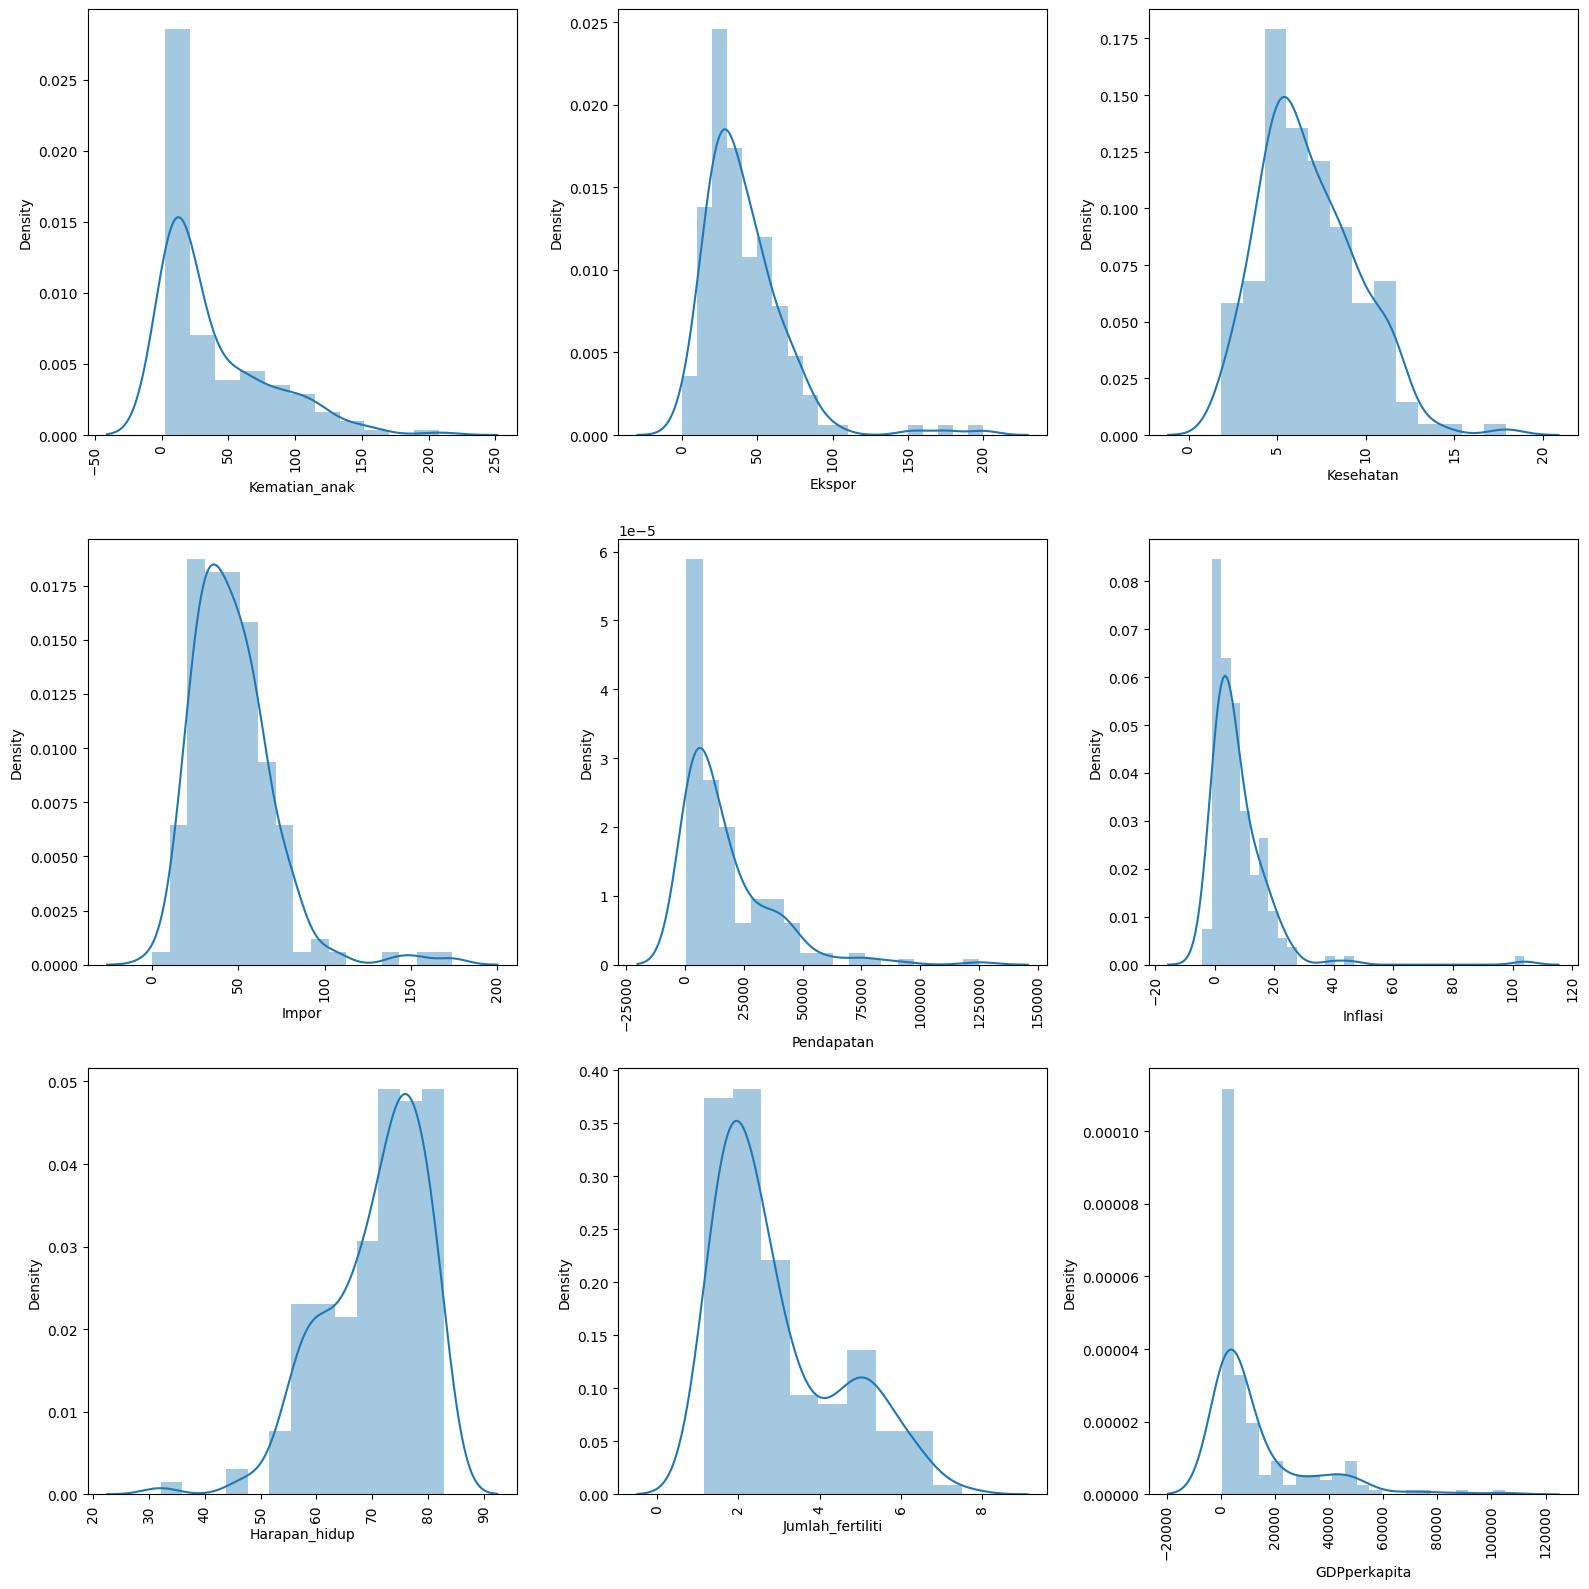

In [54]:
plt.figure(figsize=(16,16))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.distplot(df[i[1]])
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- Dari plot distribusi di atas, kita tahu bahwa ada data outliers di setiap fitur-nya.
- Kita juga dapat melihat bahwa setiap plot distribusi yang merepresentasikan suatu fitur cenderung memiliki skewness baik skew kanan maupun skew kiri. Fakta bahwa mereka memiliki skewness menunjukkan bahwa ada kesenjangan yang cukup besar antara negara maju dan negara berkembang.

##Bivariate Analysis

In [55]:
# fungsi barplot untuk setiap visualisasi top 15 negara and bottom 15 negara dari setiap kolom
def bar_plotting(n, data, ycol, xcol, newtitle, x_label,new_color):
    plt.subplot(1, 2, n)
    sns.barplot(y=ycol, x=xcol, data=data, color=new_color)
    plt.title(newtitle)
    plt.xlabel(x_label)
    plt.ylabel(None)
    sns.despine(left=True) # Remove the left, top and right spines from plot(s).
    return

- Merah = Prioritas untuk dibantu
- Biru = Bukan Prioritas

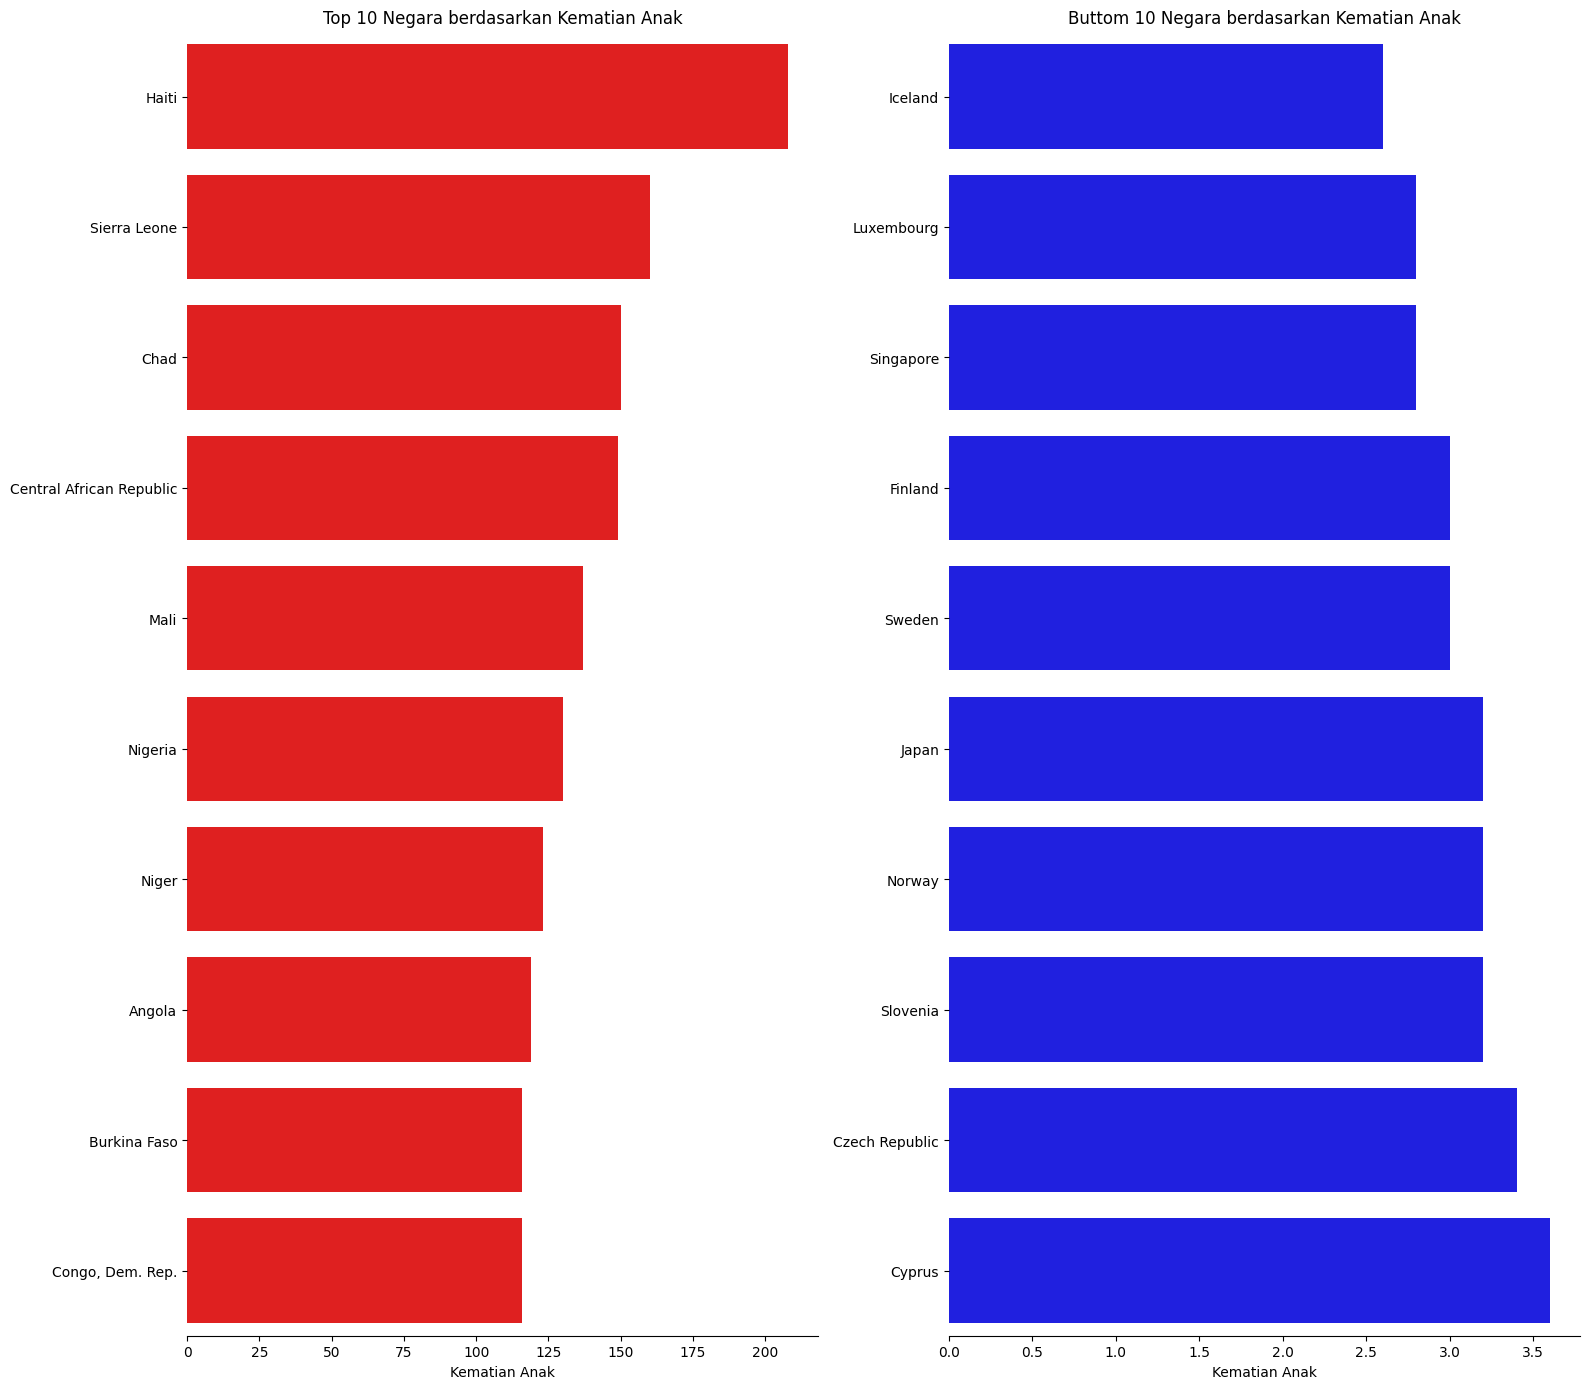

In [56]:
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(10, columns=['Kematian_anak'])
cml_df = df.nsmallest(10, columns=['Kematian_anak'])
bar_plotting(1, cmt_df, 'Negara', 'Kematian_anak', 'Top 10 Negara berdasarkan Kematian Anak', 'Kematian Anak', 'red')
bar_plotting(2, cml_df, 'Negara', 'Kematian_anak', 'Buttom 10 Negara berdasarkan Kematian Anak', 'Kematian Anak', 'blue')
plt.tight_layout() # adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

- Haiti menjadi negara dengan kematian anak terbanyak di dunia.
- Iceland menjadi negara dengan kematian anak terkecil di dunia.

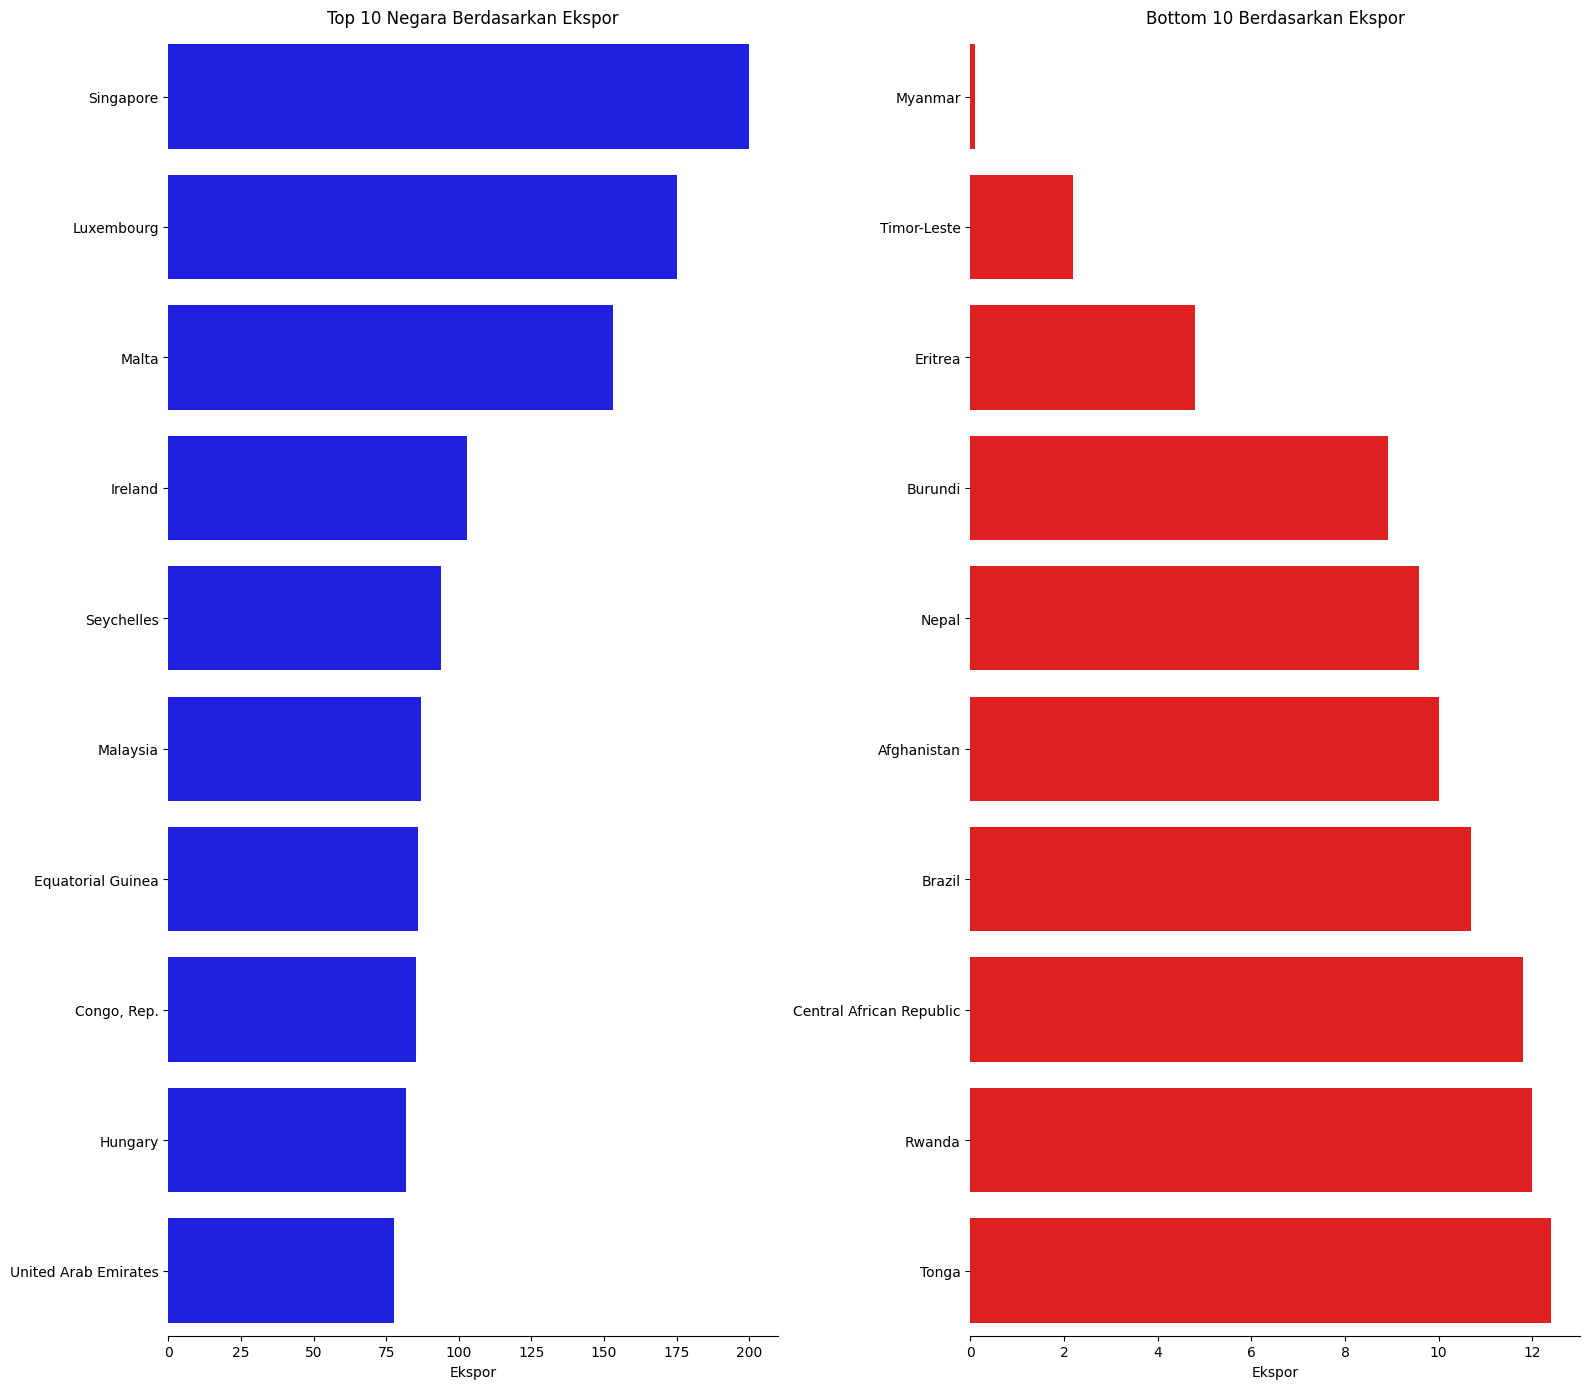

In [57]:
plt.figure(figsize=(16,14))
ext_df = df.nlargest(10, columns=['Ekspor'])
exl_df = df.nsmallest(10, columns=['Ekspor'])
bar_plotting(1, ext_df, 'Negara', 'Ekspor', 'Top 10 Negara Berdasarkan Ekspor', 'Ekspor', 'blue')
bar_plotting(2, exl_df, 'Negara', 'Ekspor', 'Bottom 10 Berdasarkan Ekspor', 'Ekspor', 'red')
plt.tight_layout()
plt.show()

- Singapura menjadi negara pengekspor dengan perkapita terbanyak di dunia
- Myanmar menjadi negara pengekspor dengan perkapita terendah di dunia

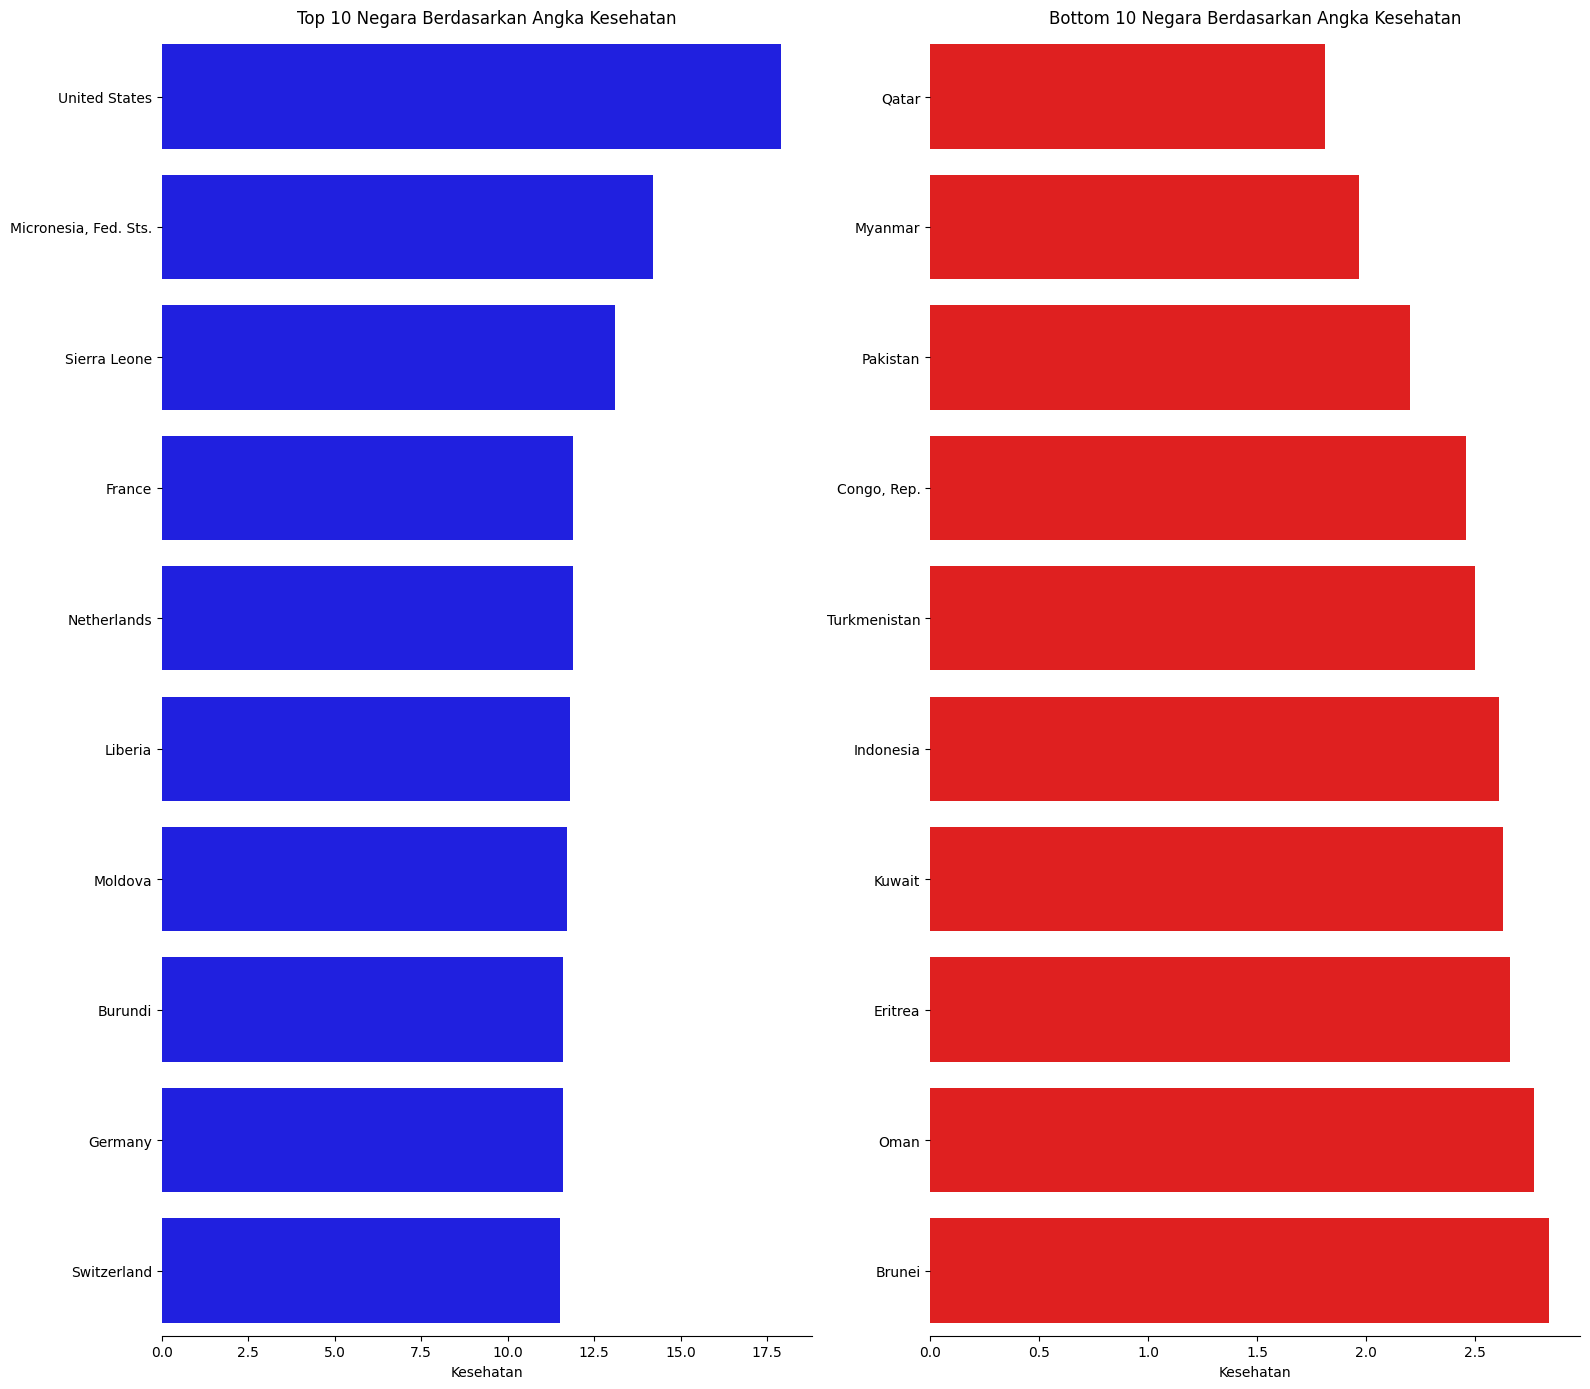

In [58]:
plt.figure(figsize=(16,14))
htt_df = df.nlargest(10, columns=['Kesehatan'])
htl_df = df.nsmallest(10, columns=['Kesehatan'])
bar_plotting(1, htt_df, 'Negara', 'Kesehatan', 'Top 10 Negara Berdasarkan Angka Kesehatan', 'Kesehatan', 'blue')
bar_plotting(2, htl_df, 'Negara', 'Kesehatan', 'Bottom 10 Negara Berdasarkan Angka Kesehatan', 'Kesehatan', 'red')
plt.tight_layout()
plt.show()

- US menjadi negara dengan angka kesehatan tertinggi di dunia
- Qatar menjadi negara dengan angka kesehatan terendah di dunia

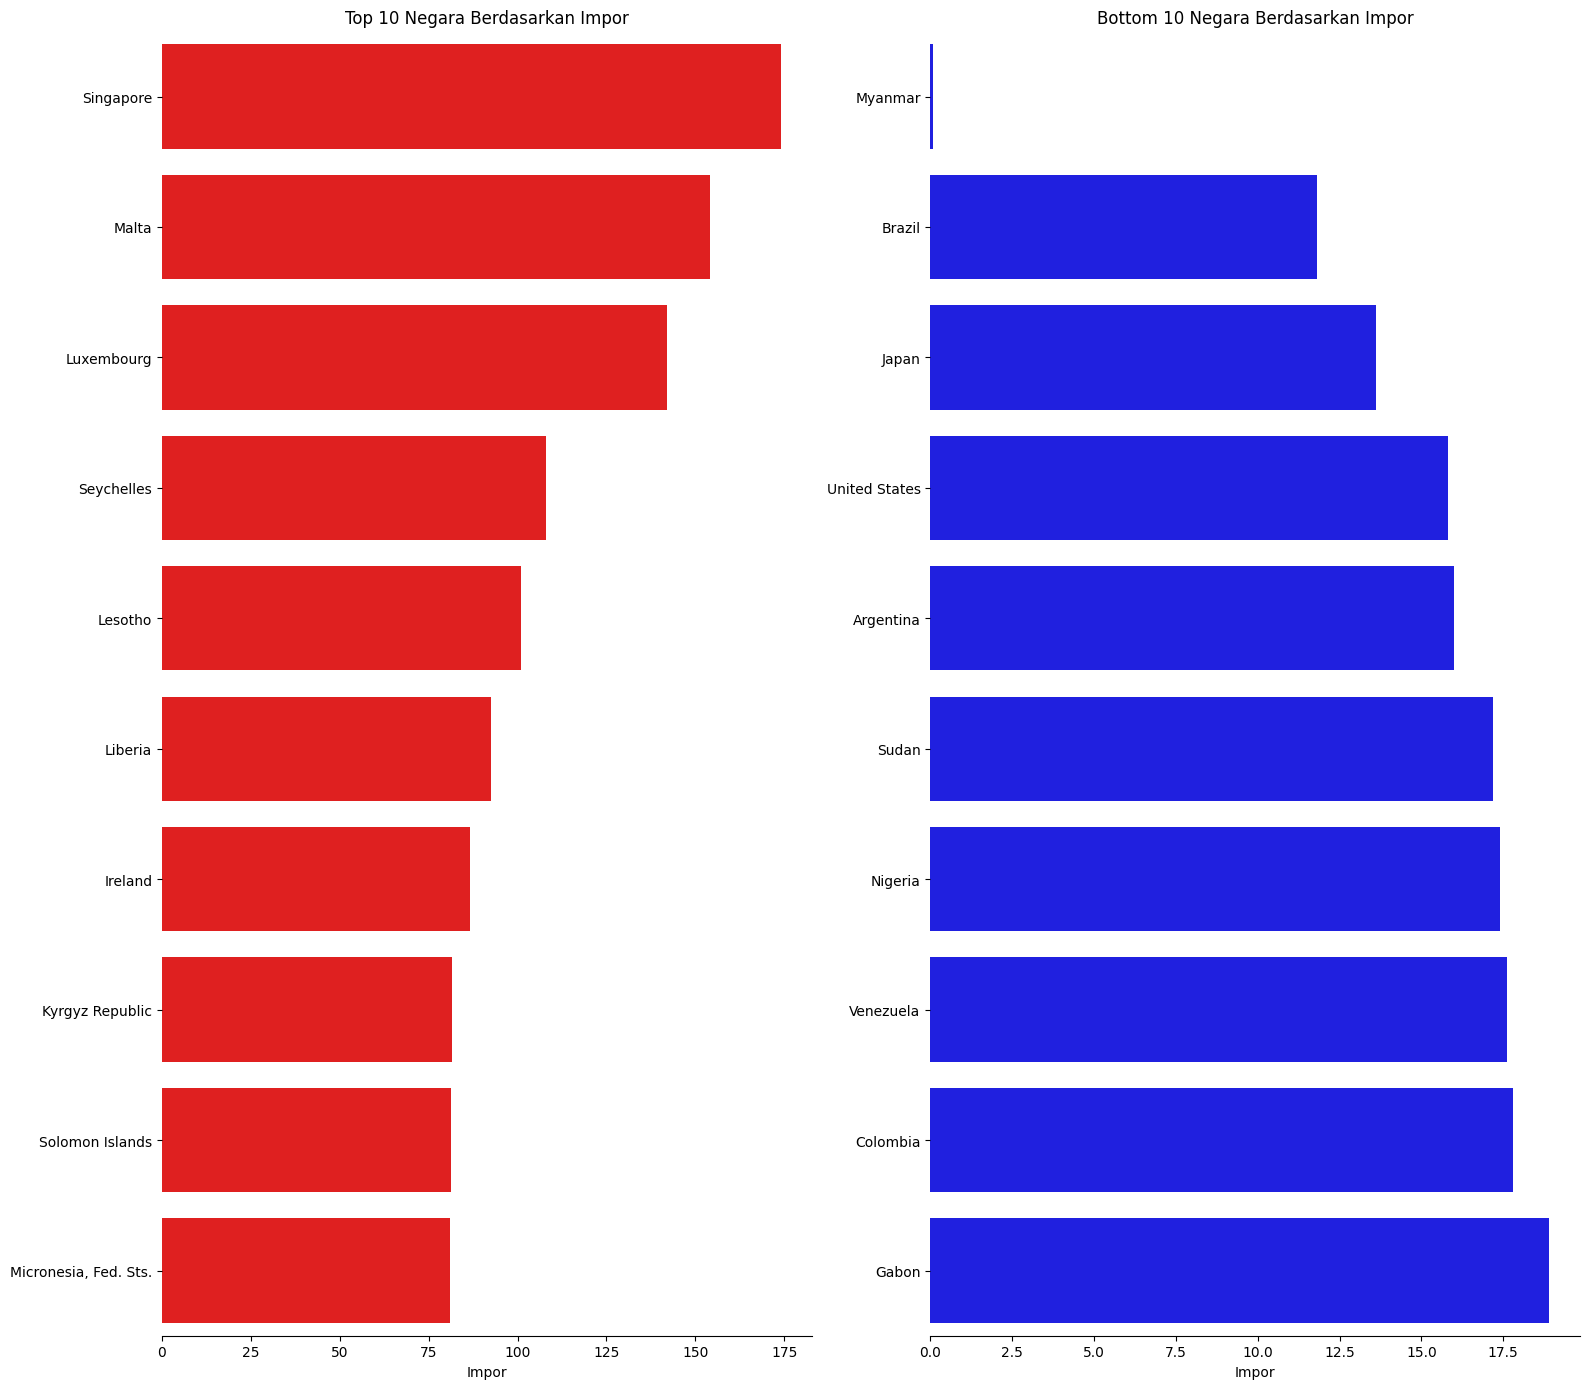

In [59]:
plt.figure(figsize=(16,14))
imt_df = df.nlargest(10, columns=['Impor'])
iml_df = df.nsmallest(10, columns=['Impor'])
bar_plotting(1, imt_df, 'Negara', 'Impor', 'Top 10 Negara Berdasarkan Impor', 'Impor', 'red')
bar_plotting(2, iml_df, 'Negara', 'Impor', 'Bottom 10 Negara Berdasarkan Impor', 'Impor', 'blue')
plt.tight_layout()
plt.show()

- Singapura menjadi negara pengimpor dengan perkapita terbanyak di dunia
- Myanmar menjadi negara pengimpor dengan perkapita terendah di dunia

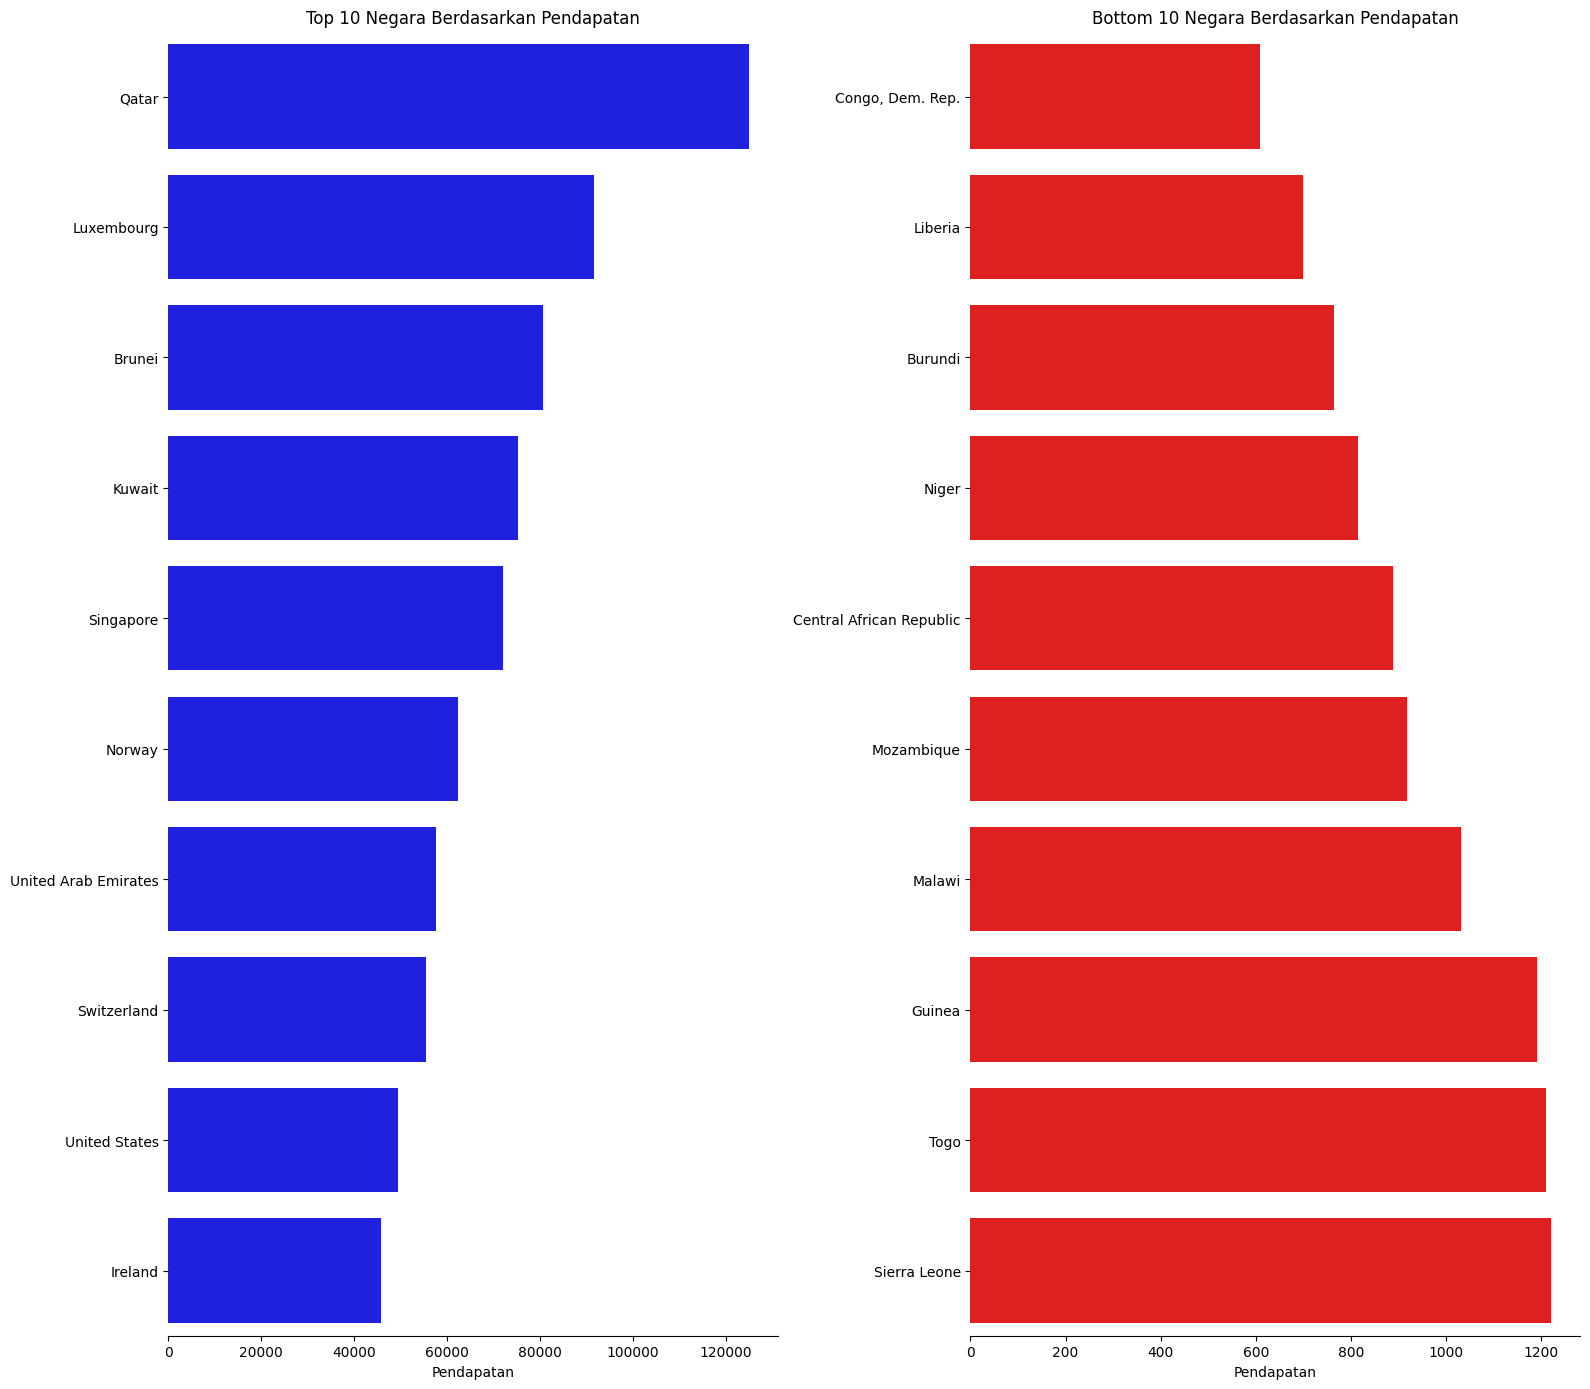

In [60]:
plt.figure(figsize=(16,14))
int_df = df.nlargest(10, columns=['Pendapatan'])
inl_df = df.nsmallest(10, columns=['Pendapatan'])
bar_plotting(1, int_df, 'Negara', 'Pendapatan', 'Top 10 Negara Berdasarkan Pendapatan', 'Pendapatan', 'blue')
bar_plotting(2, inl_df, 'Negara', 'Pendapatan', 'Bottom 10 Negara Berdasarkan Pendapatan', 'Pendapatan', 'red')
plt.tight_layout()
plt.show()

- Qatar menjadi negara dengan pendapatan bersih perorang tertinggi di dunia
- Congo menjadi negara dengan pendapatan bersih perorang terendah di dunia

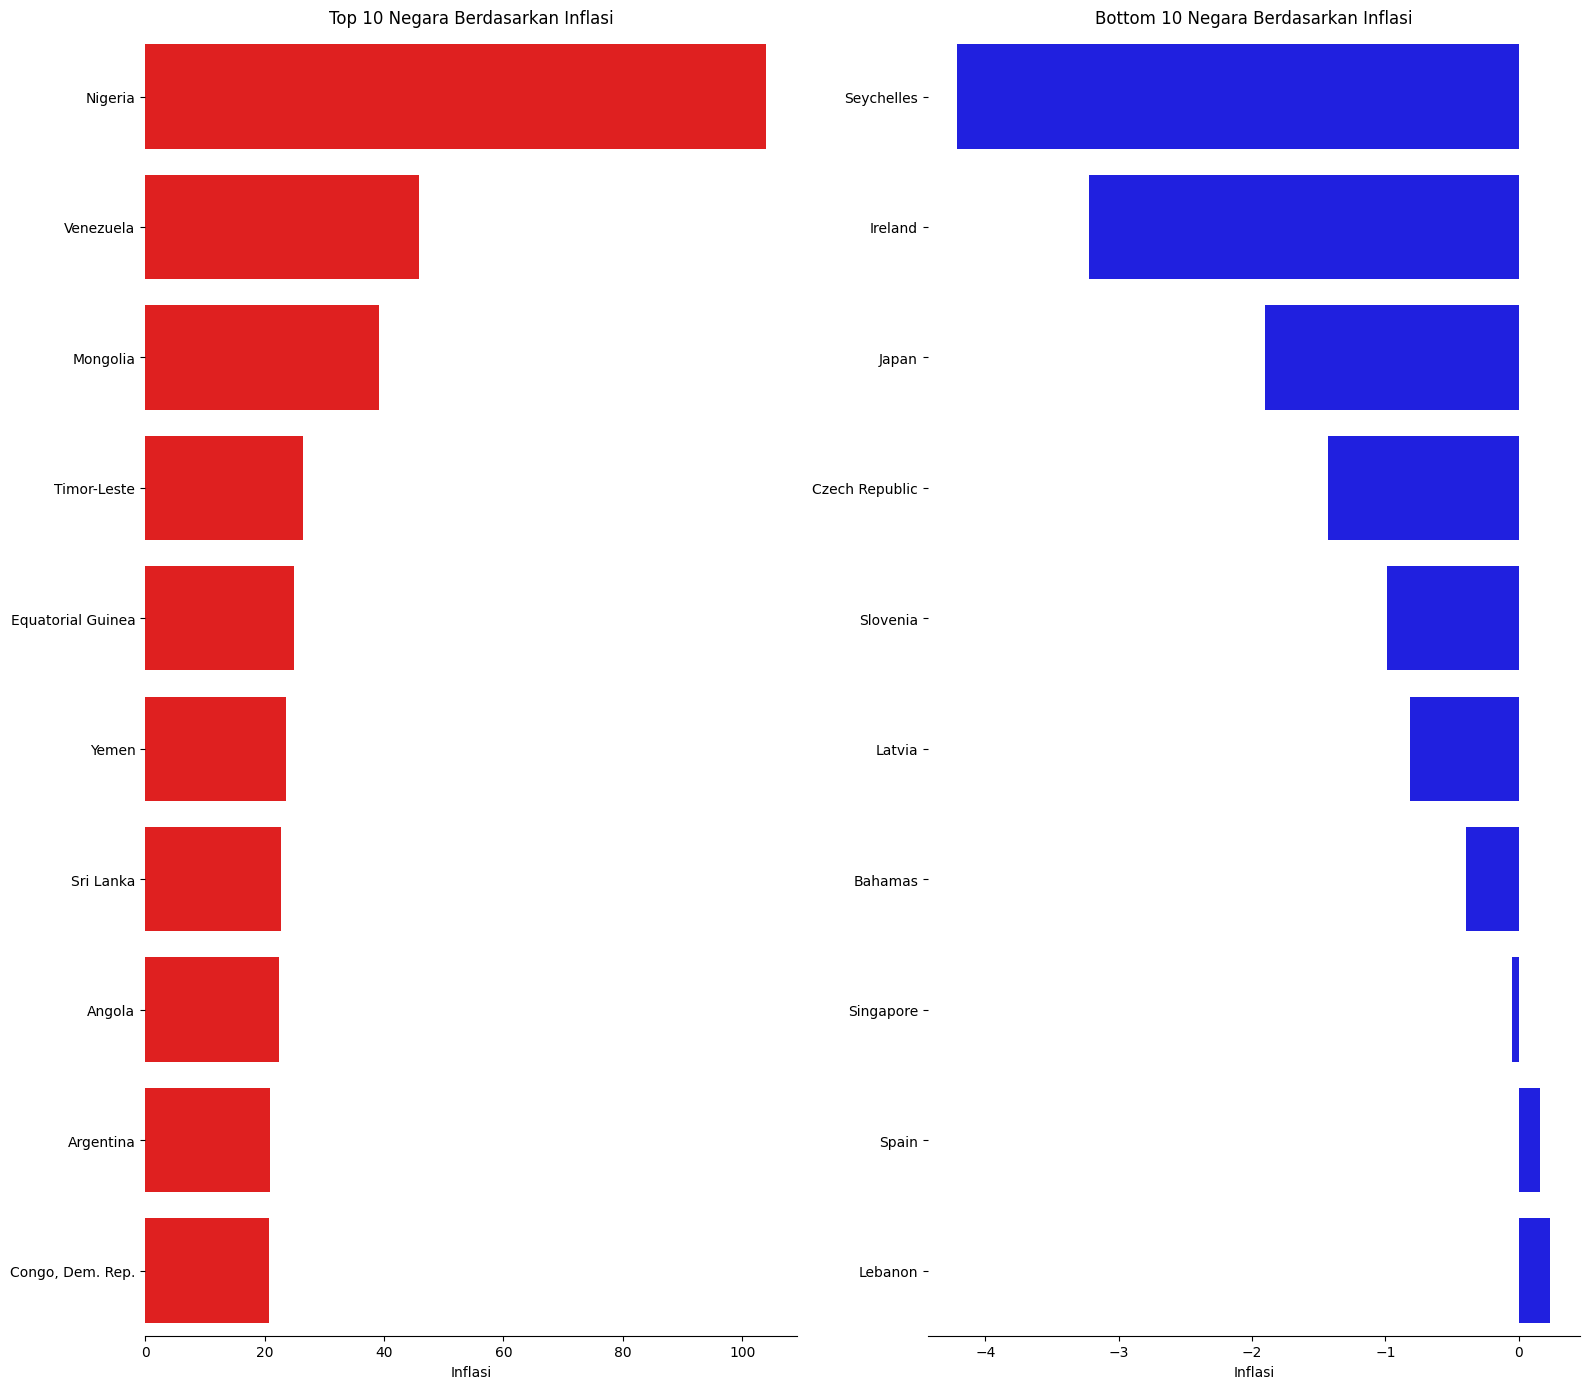

In [61]:
plt.figure(figsize=(16,14))
ift_df = df.nlargest(10, columns=['Inflasi'])
ifl_df = df.nsmallest(10, columns=['Inflasi'])
bar_plotting(1, ift_df, 'Negara', 'Inflasi', 'Top 10 Negara Berdasarkan Inflasi', 'Inflasi', 'red')
bar_plotting(2, ifl_df, 'Negara', 'Inflasi', 'Bottom 10 Negara Berdasarkan Inflasi', 'Inflasi', 'blue')
plt.tight_layout()
plt.show()

- Nigeria menjadi negara dengan inflasi tertinggi di dunia.
- Seychelles menjadi negara dengan inflasi terendah di dunia.

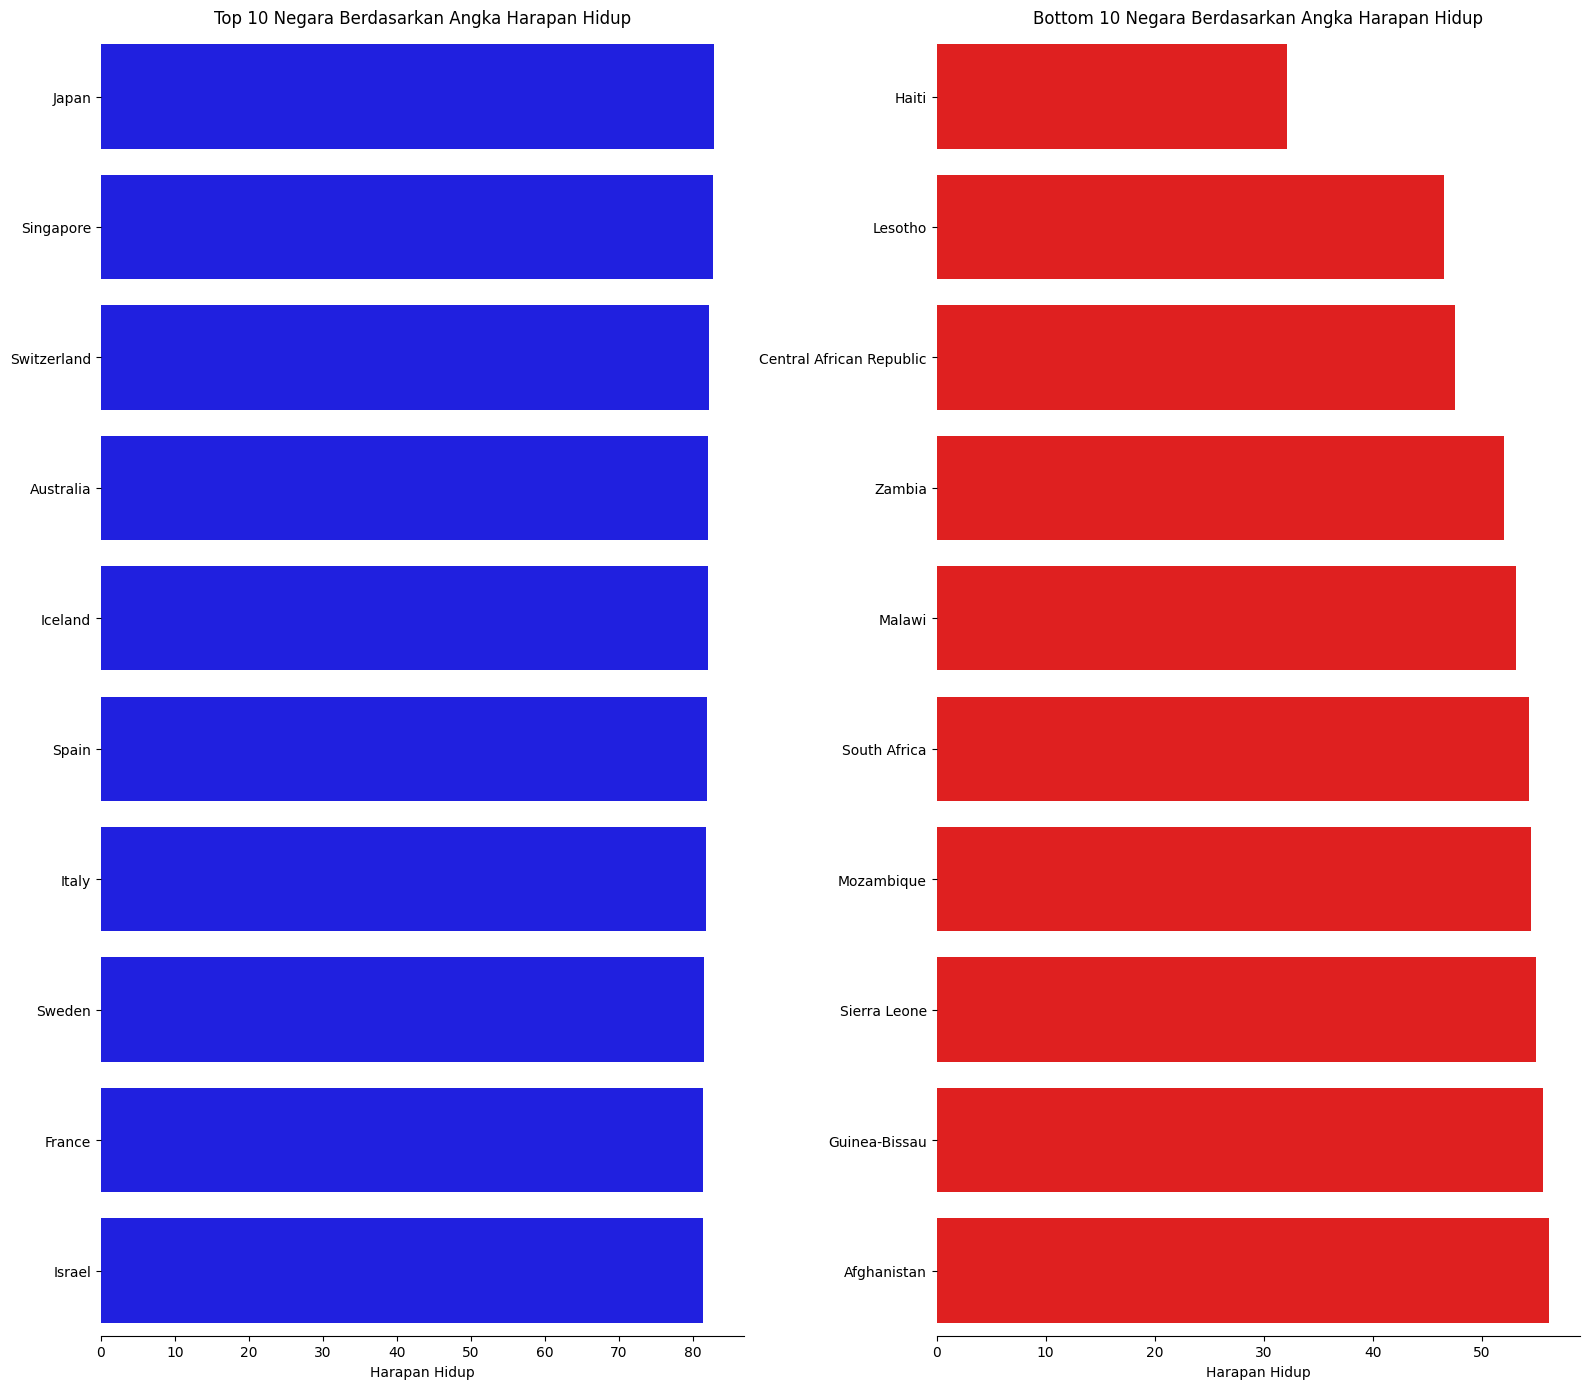

In [62]:
plt.figure(figsize=(16,14))
let_df = df.nlargest(10, columns=['Harapan_hidup'])
lel_df = df.nsmallest(10, columns=['Harapan_hidup'])
bar_plotting(1, let_df, 'Negara', 'Harapan_hidup', 'Top 10 Negara Berdasarkan Angka Harapan Hidup', 'Harapan Hidup', 'blue')
bar_plotting(2, lel_df, 'Negara', 'Harapan_hidup', 'Bottom 10 Negara Berdasarkan Angka Harapan Hidup', 'Harapan Hidup', 'red')
plt.tight_layout()
plt.show()

- Jepang menjadi negara dengan angka harapan hidup tertinggi di dunia
- Haiti menjadi negara dengan angka harapan hidup terendah di dunia

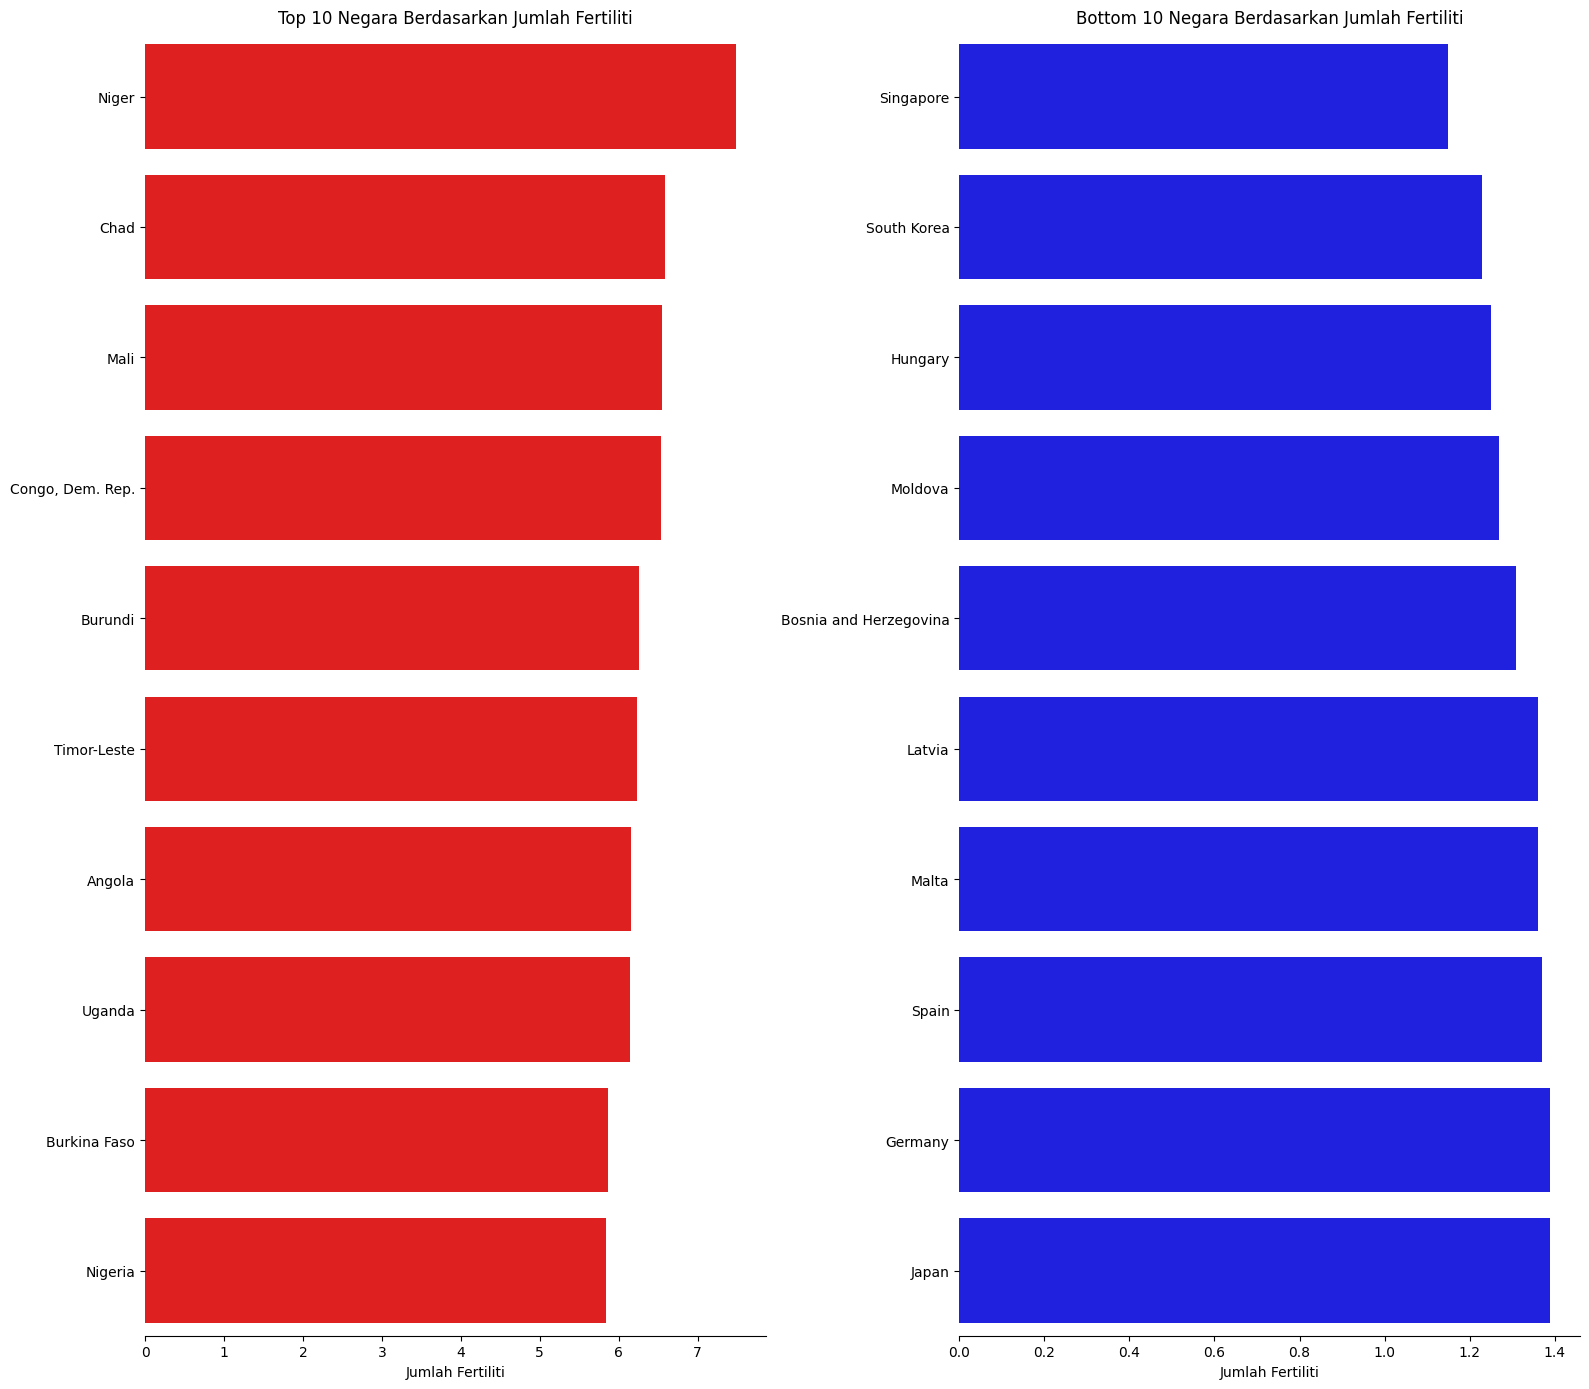

In [63]:
plt.figure(figsize=(16,14))
fet_df = df.nlargest(10, columns=['Jumlah_fertiliti'])
fel_df = df.nsmallest(10, columns=['Jumlah_fertiliti'])
bar_plotting(1, fet_df, 'Negara', 'Jumlah_fertiliti', 'Top 10 Negara Berdasarkan Jumlah Fertiliti', 'Jumlah Fertiliti', 'red')
bar_plotting(2, fel_df, 'Negara', 'Jumlah_fertiliti', 'Bottom 10 Negara Berdasarkan Jumlah Fertiliti', 'Jumlah Fertiliti', 'blue')
plt.tight_layout()
plt.show()

- Niger menjadi negara dengan Jumlah Fertiliti tertinggi di dunia.
- Singapura menjadi negara dengan Jumlah Fertiliti terendah di dunia.

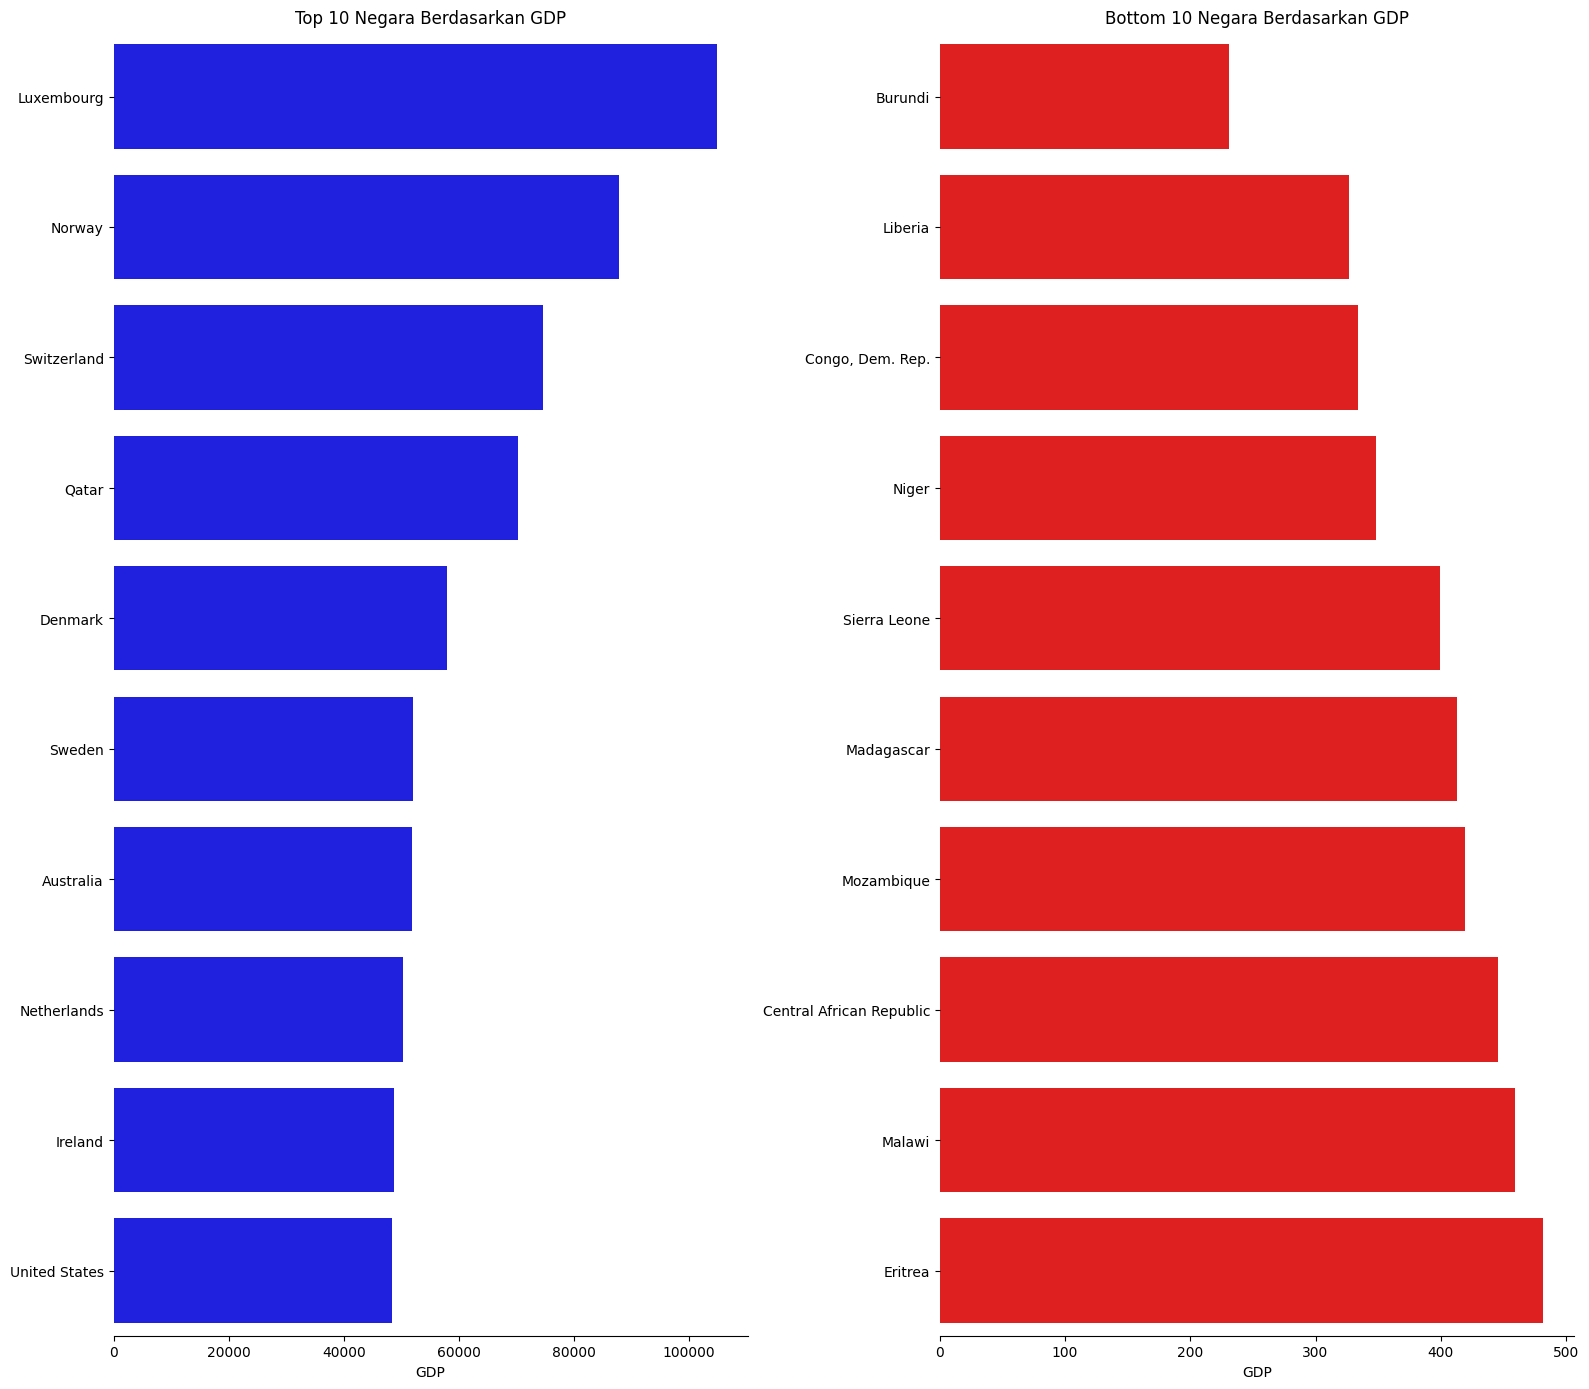

In [64]:
plt.figure(figsize=(16,14))
gdt_df = df.nlargest(10, columns=['GDPperkapita'])
gdl_df = df.nsmallest(10, columns=['GDPperkapita'])
bar_plotting(1, gdt_df, 'Negara', 'GDPperkapita', 'Top 10 Negara Berdasarkan GDP', 'GDP', 'blue')
bar_plotting(2, gdl_df, 'Negara', 'GDPperkapita', 'Bottom 10 Negara Berdasarkan GDP', 'GDP', 'red')
plt.tight_layout()
plt.show()

- Luxembourg menjadi negara dengan GDP per kapita tertinggi di dunia.
- Burundi menjadi negara dengan GDP per kapita terendah di dunia.

##Multivariate Analysis

<Figure size 1600x1400 with 0 Axes>

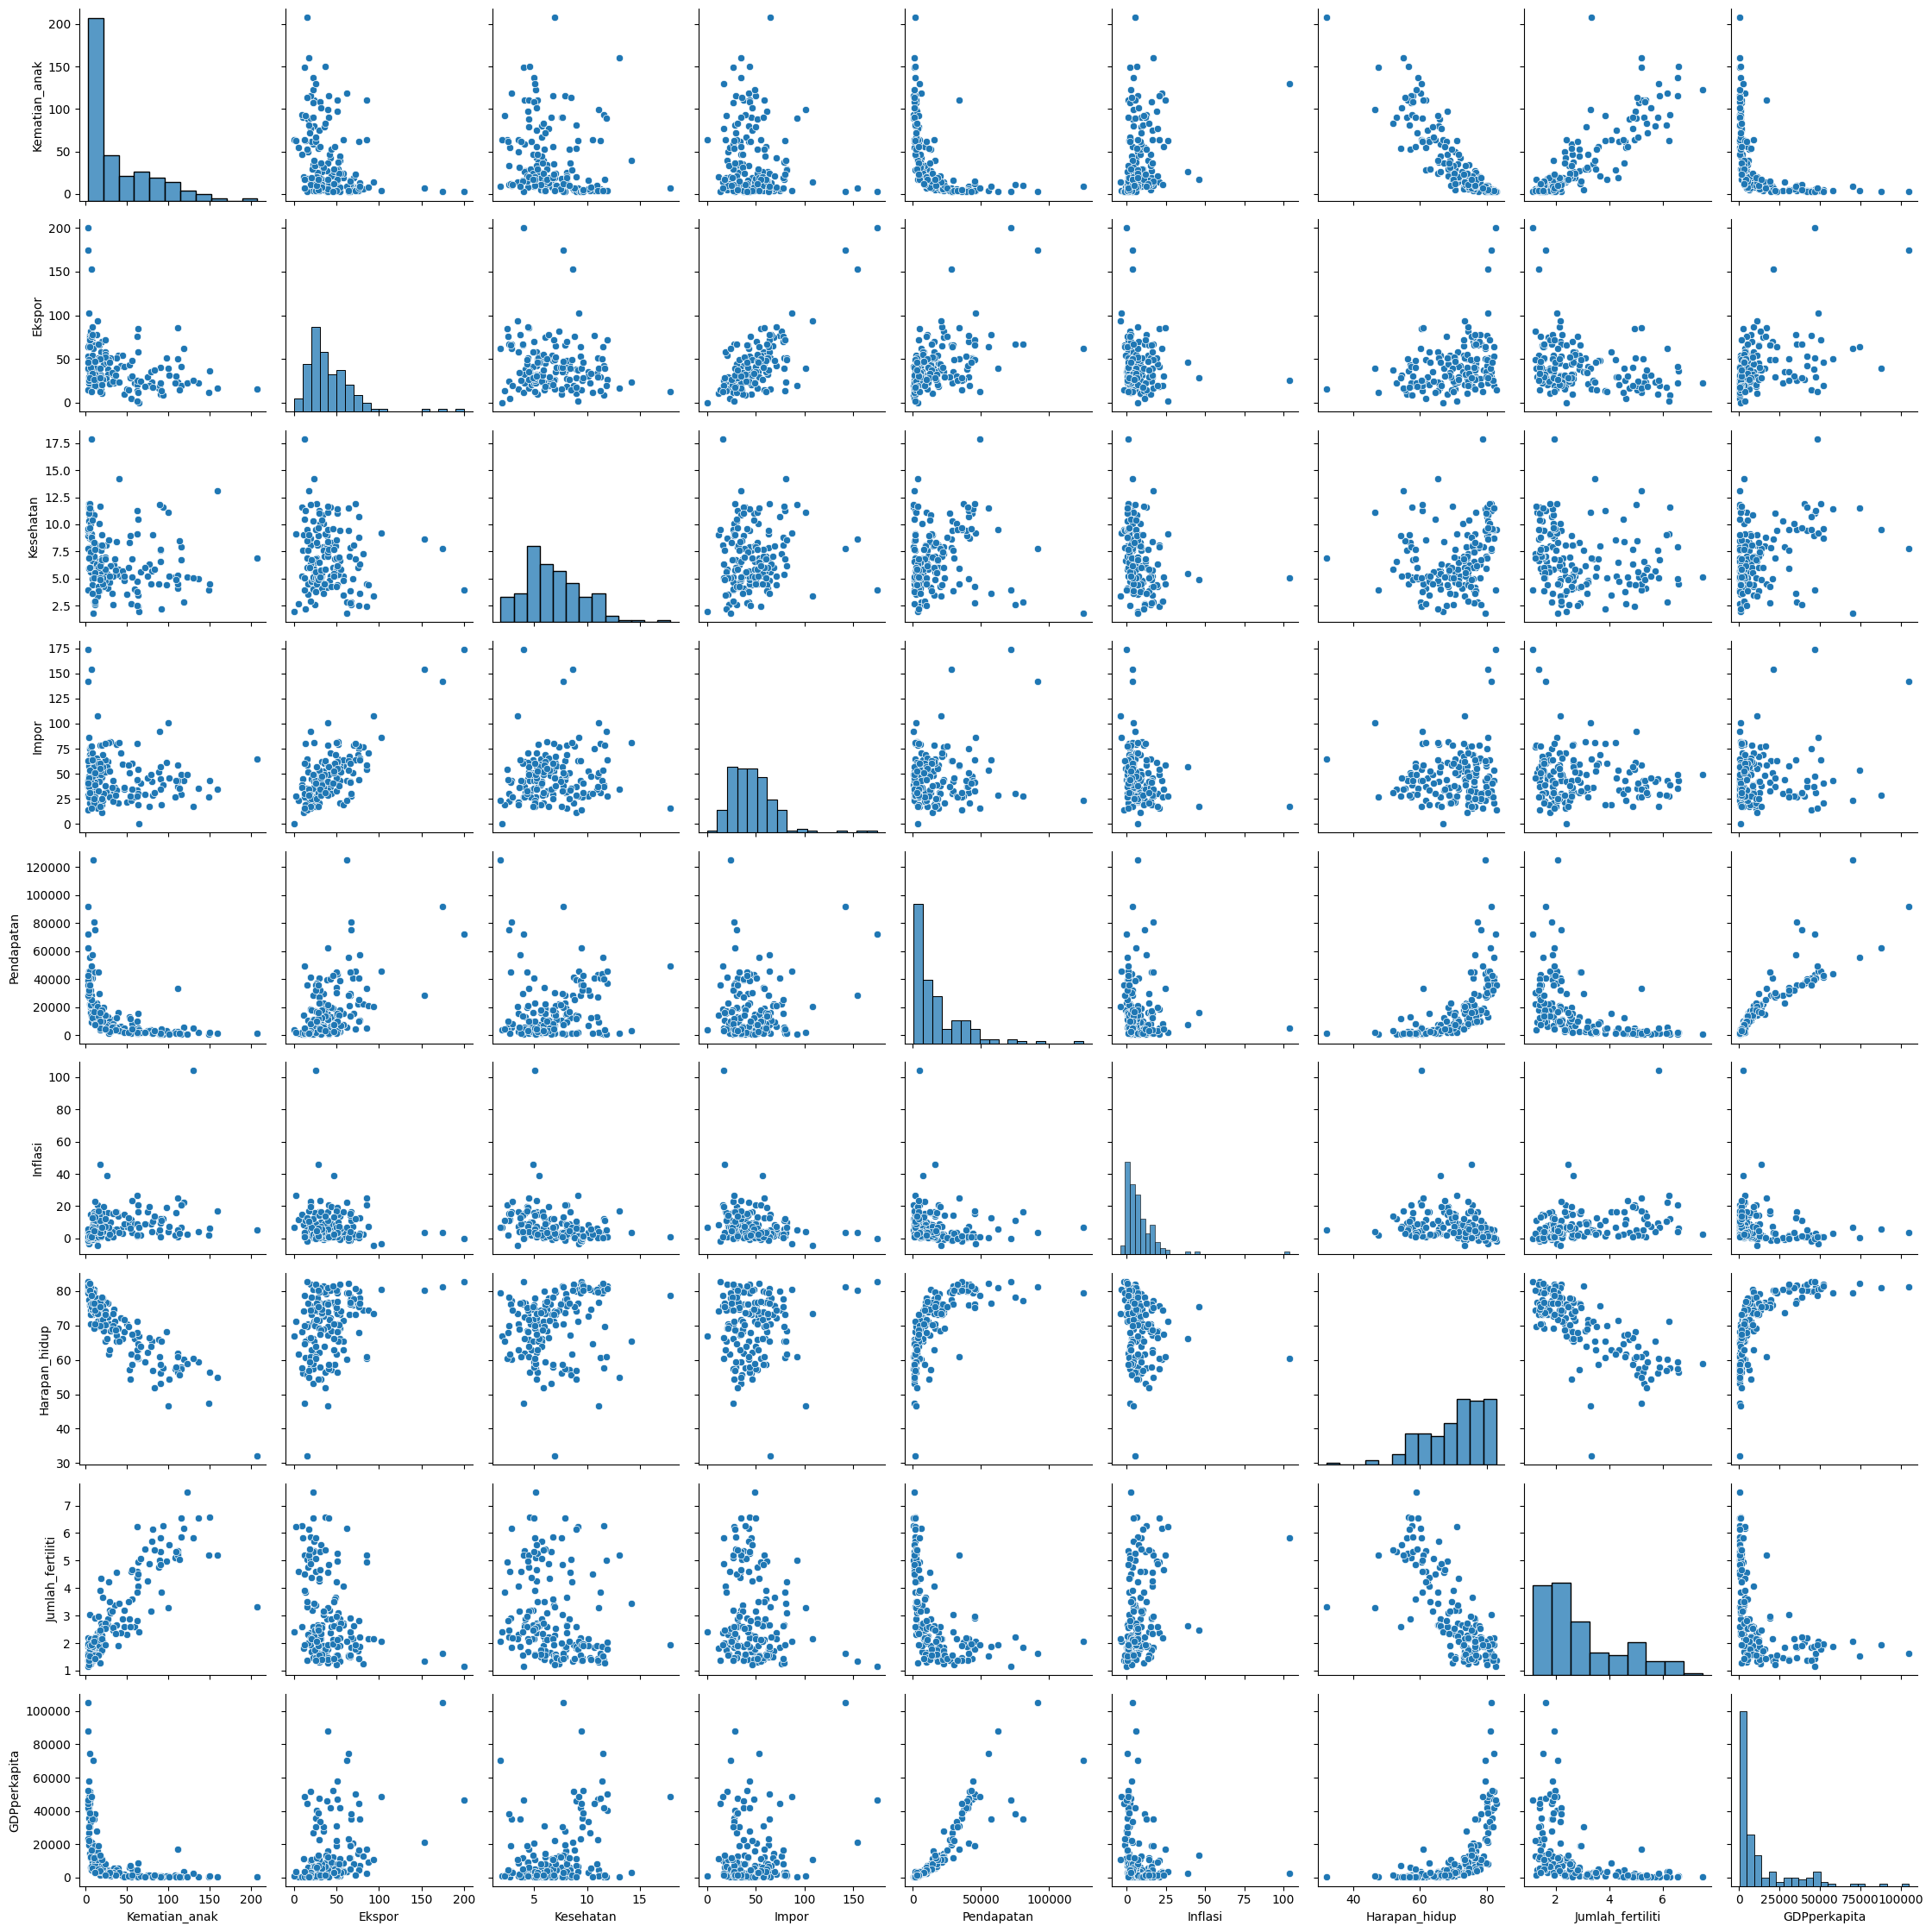

In [65]:
# Visualisasi data dengan pairplot untuk melihat connections antar variables
plt.figure(figsize=(16,14))
sns.pairplot(df)
plt.tight_layout()
plt.show()

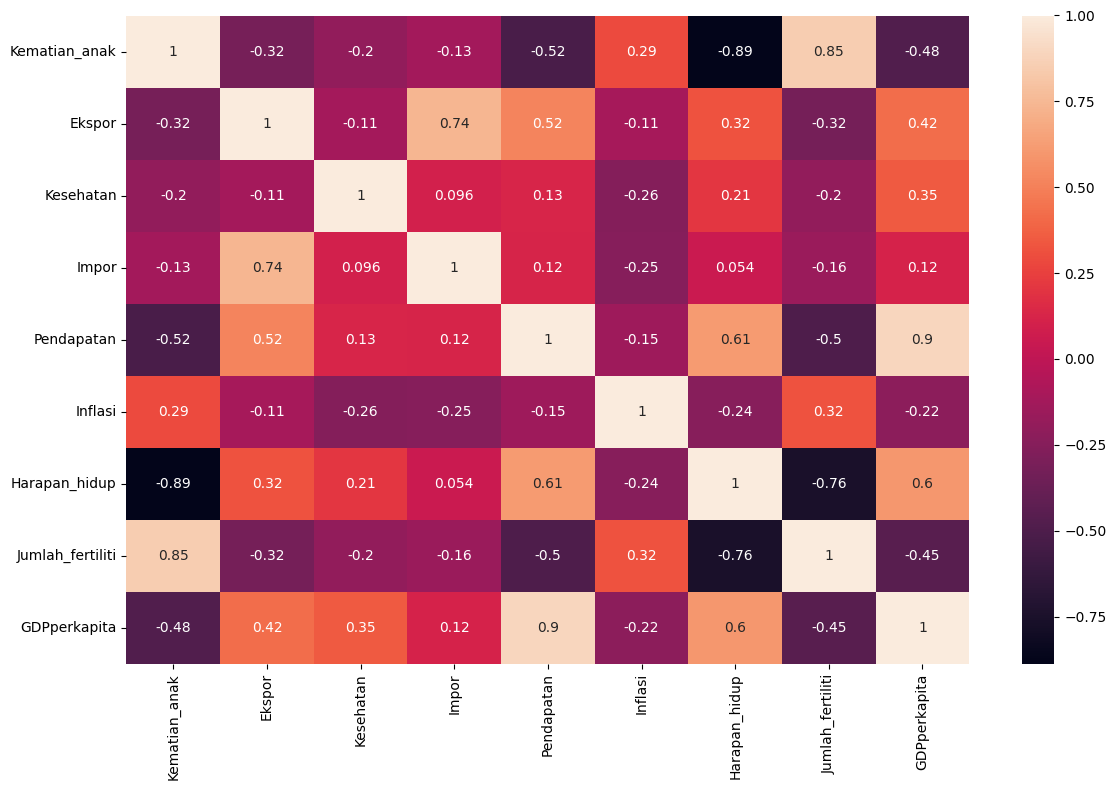

In [66]:
# Visualisasi data dengan heatmap untuk melihat correlation antar variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.tight_layout()
plt.show()

Dari Pairplot dan Heatmap di atas, diketahui:

- GDPperkapita dan Pendapatan memiliki korelasi positif yang tinggi (0.9). Itu artinya negara-negara yang memiliki pendapatan tinggi akan memiliki GDPperkapita yang tinggi pula.
- Kematian_anak dan Jumlah_Fertiliti juga memiliki korelasi positif yang tinggi (0.85).
- Impor dan Ekspor juga memiliki korelasi positif yang tinggi (0.74).
- Pendapatan dan Harapan_Hidup juga memiliki korelasi positif yang tinggi (0.61).
- GDPperkapita dan Harapan_hidup juga memiliki korelasi positif yang tinggi (0.6).
- Harapan_hidup dan Jumlah_fertiliti memiliki korelasi negatif yang tinggi. Itu artinya negara-negara yang memiliki Harapan_hidup tinggi akan mempunyai angka Jumlah_fertiliti yang rendah
- Harapan_hidup dan Kematian_anak juga memiliki korelasi negatif yang tinggi (-0.89).

##Handling Outliers

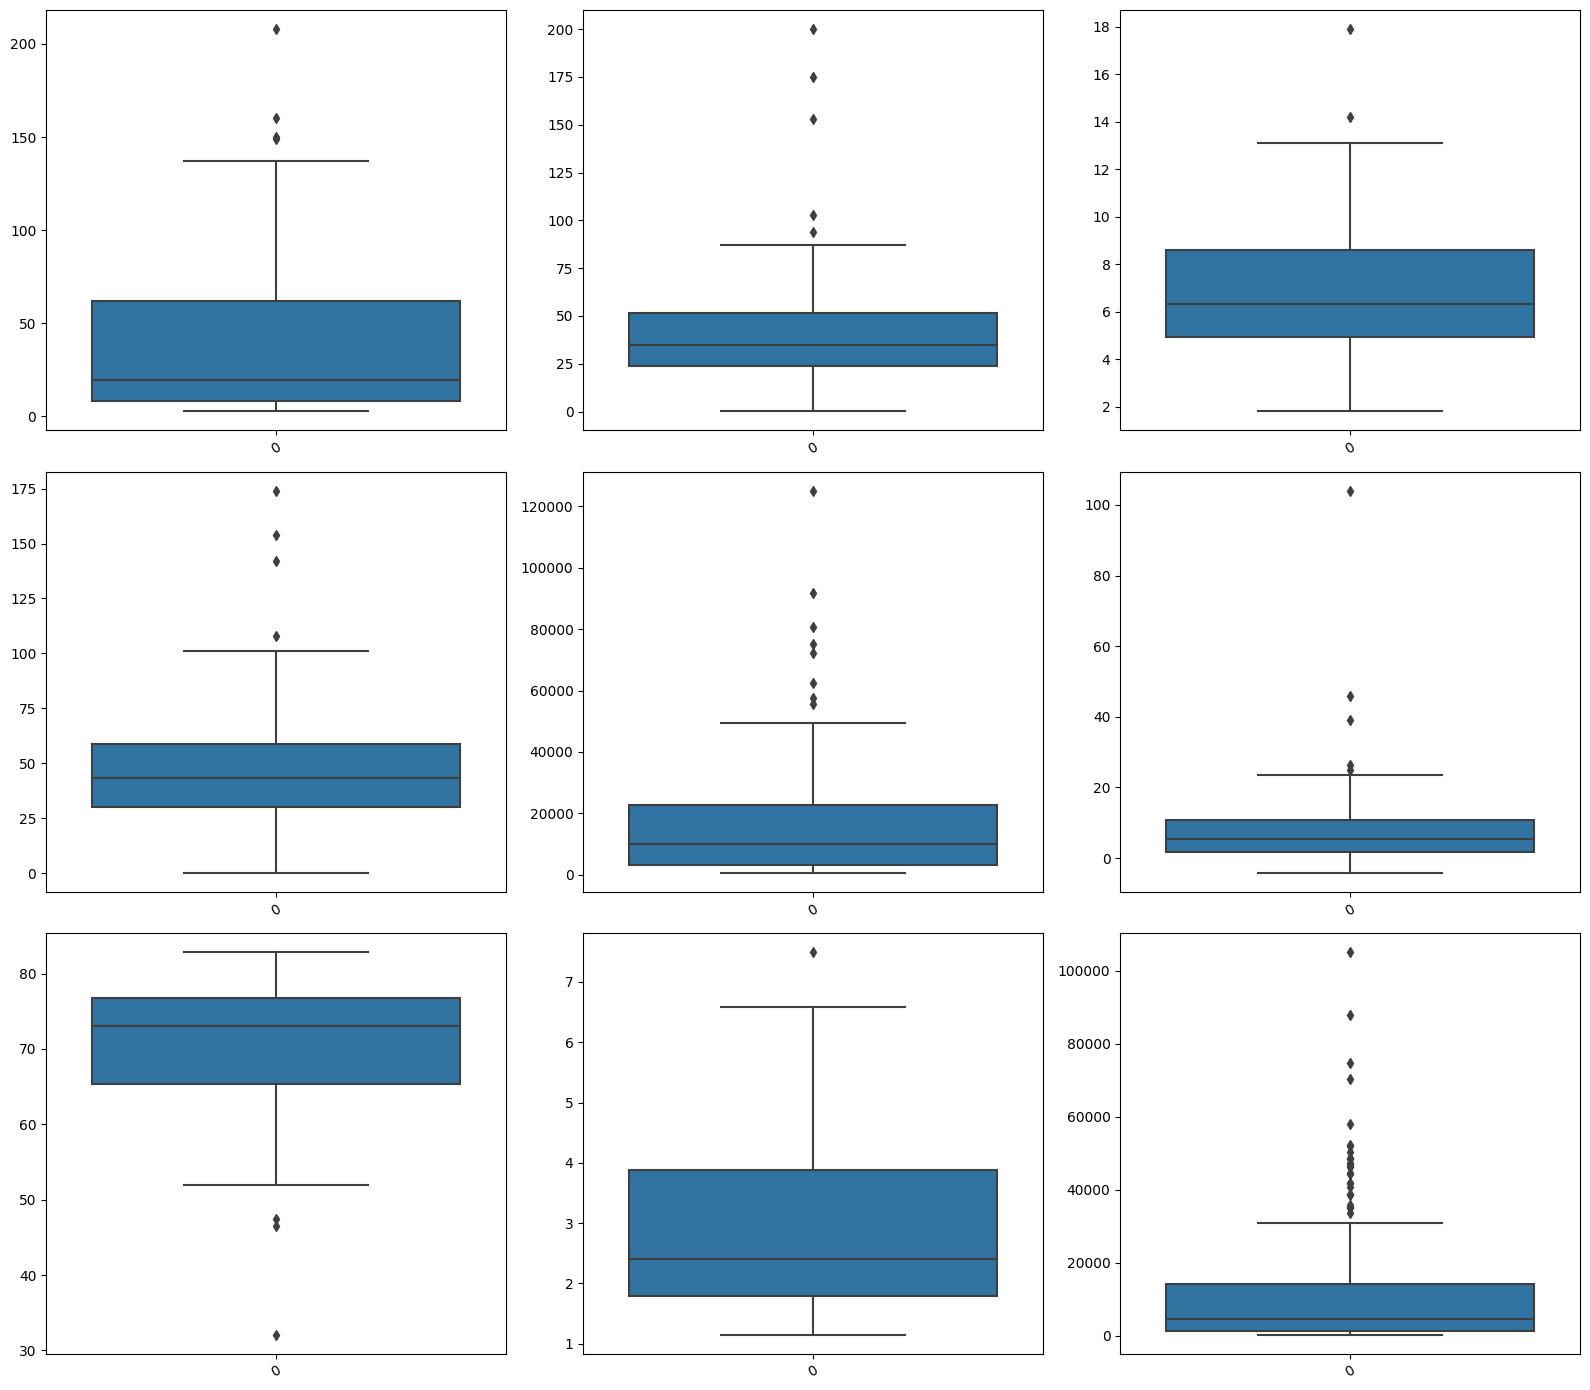

In [67]:
plt.figure(figsize=(16,14))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

Dari boxplots di atas, kita tahu bahwa setiap kolom dari dataframe memiliki outlier. Walaupun outlier dapat mempengaruhi hasil pengelompokan, mereka tidak dapat dihilangkan karena penghapusan outlier akan berdampak pada peringkat negara yang membutuhkan bantuan keuangan dari HELP International. Oleh karena itu, kita akan menggunakan pendekatan lain dengan membatasi outlier karena tujuan kita adalah menemukan daftar negara yang membutuhkan bantuan keuangan dari HELP International. Oleh karena itu, kita dapat membatasi sebagian kecil dari outlier. Untuk meminimalkan bias, pembatasan akan didasarkan pada persentil ke-99.

Outlier dibatasi dalam fitur berikut (Fitur outlier terbanyak) : 'Ekspor', 'Impor' , 'Pendapatan', 'Kesehatan', 'Inflasi' dan 'GDPperkapita'.

Outlier tidak dibatasi dalam fitur berikut : 'Kematian_anak', 'Harapan_hidup' , dan 'Jumlah_fertiliti'.

In [68]:
cap_features = ['Ekspor', 'Kesehatan' ,'Impor' ,'Pendapatan' ,'Inflasi' , 'GDPperkapita']
new_df = df.copy()
for col in cap_features:
    q4 = new_df[col].quantile(0.99)
    new_df.loc[new_df[col] >= q4, col] = q4

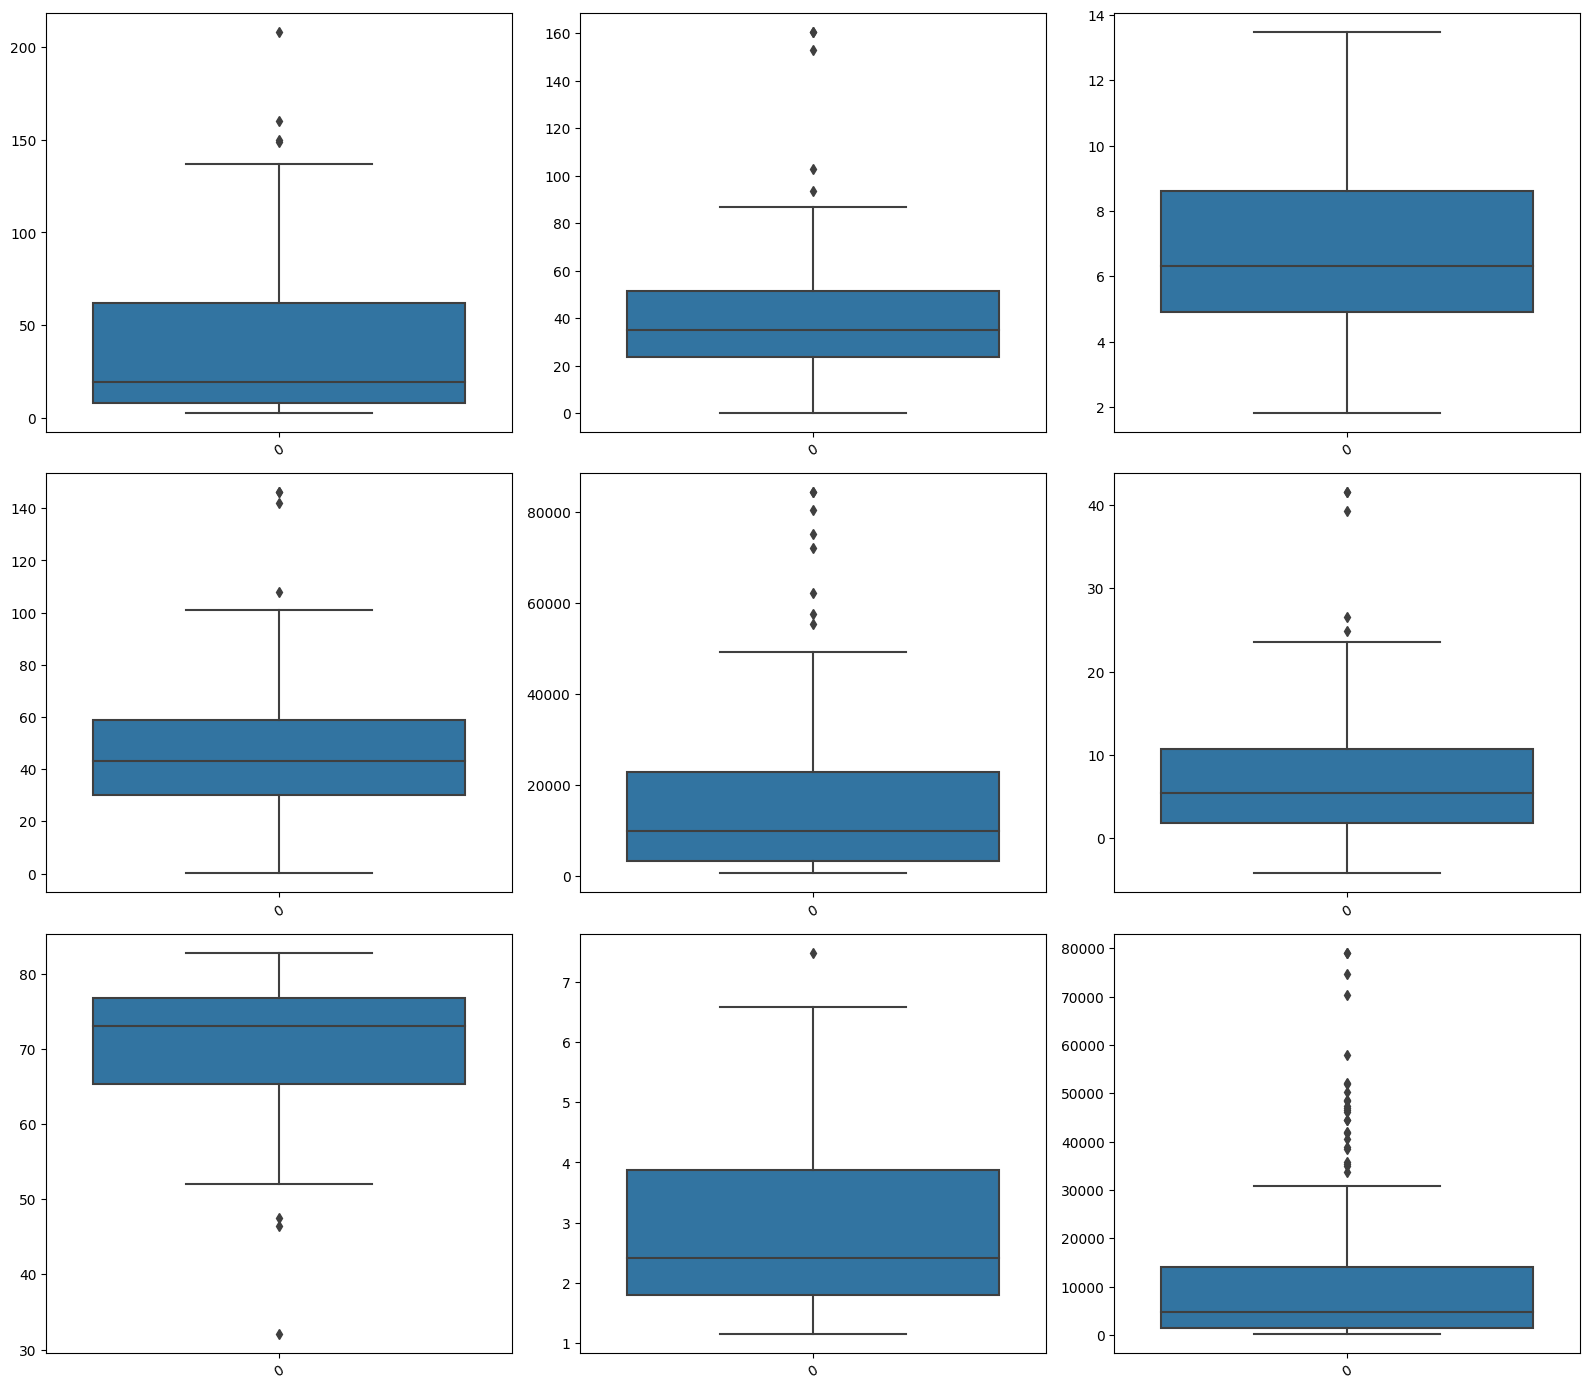

In [69]:
# Setelah capping the outliers
plt.figure(figsize=(16,14))

for i in enumerate(new_df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(new_df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

#Scalling Data
Untuk membuat clustering lebih akurat, akan dilakukan penstandaran data dengan menskala ulang menggunakan standard scaler yang disediakan oleh scikit-learn.

In [31]:
# Drop non-numeric column sehingga kita dapat rescale datanya
num_df = new_df.drop(columns='Negara')
num_df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.620,63.0,3.50,2970.0
163,17.1,28.5,4.91,17.6,16500.0,41.478,75.4,2.47,13500.0
164,23.3,72.0,6.84,80.2,4490.0,12.100,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.600,67.5,4.67,1310.0


In [32]:
# Rescale the data using Standard Scaler
sc = StandardScaler()
scaled_df = sc.fit_transform(num_df)
scaled_df

array([[ 1.29153238, -1.19927911,  0.30123858, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.49806893, -0.08896601, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.09292528, -0.99060381, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541,  1.21600038,  0.02089742, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.42015669, -0.60797601, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.14746385, -0.33900002, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [33]:
scaled_df = pd.DataFrame(scaled_df, columns = num_df.columns)
scaled_df.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-1.199279,0.301239,-0.076771,-0.851668,0.265002,-1.619092,1.902882,-0.702259
1,-0.538949,-0.498069,-0.088966,0.083204,-0.386946,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272833,-0.092925,-0.990604,-0.660465,-0.221053,1.122161,0.670423,-0.038404,-0.477434
3,2.007808,0.838126,-1.490672,-0.163244,-0.612045,1.932987,-1.179234,2.128151,-0.530950
4,-0.695634,0.183663,-0.285963,0.528541,0.125254,-0.764618,0.704258,-0.541946,-0.032042


#K-Means Clustering

In [34]:
# Clustering dengan n_cluster 2
kmeans1 = KMeans(n_clusters = 2, random_state = 42).fit(scaled_df)
labels1 = kmeans1.labels_

In [35]:
# Cek 
tempdf = new_df.copy()
tempdf['kmeans_2cluster'] = labels1

print('Cluster and its countries quantity :')
display(tempdf['kmeans_2cluster'].value_counts(ascending=True))
print()

display(tempdf.head())

Cluster and its countries quantity :


1    72
0    95
Name: kmeans_2cluster, dtype: int64

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,kmeans_2cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


<Figure size 1600x2000 with 0 Axes>

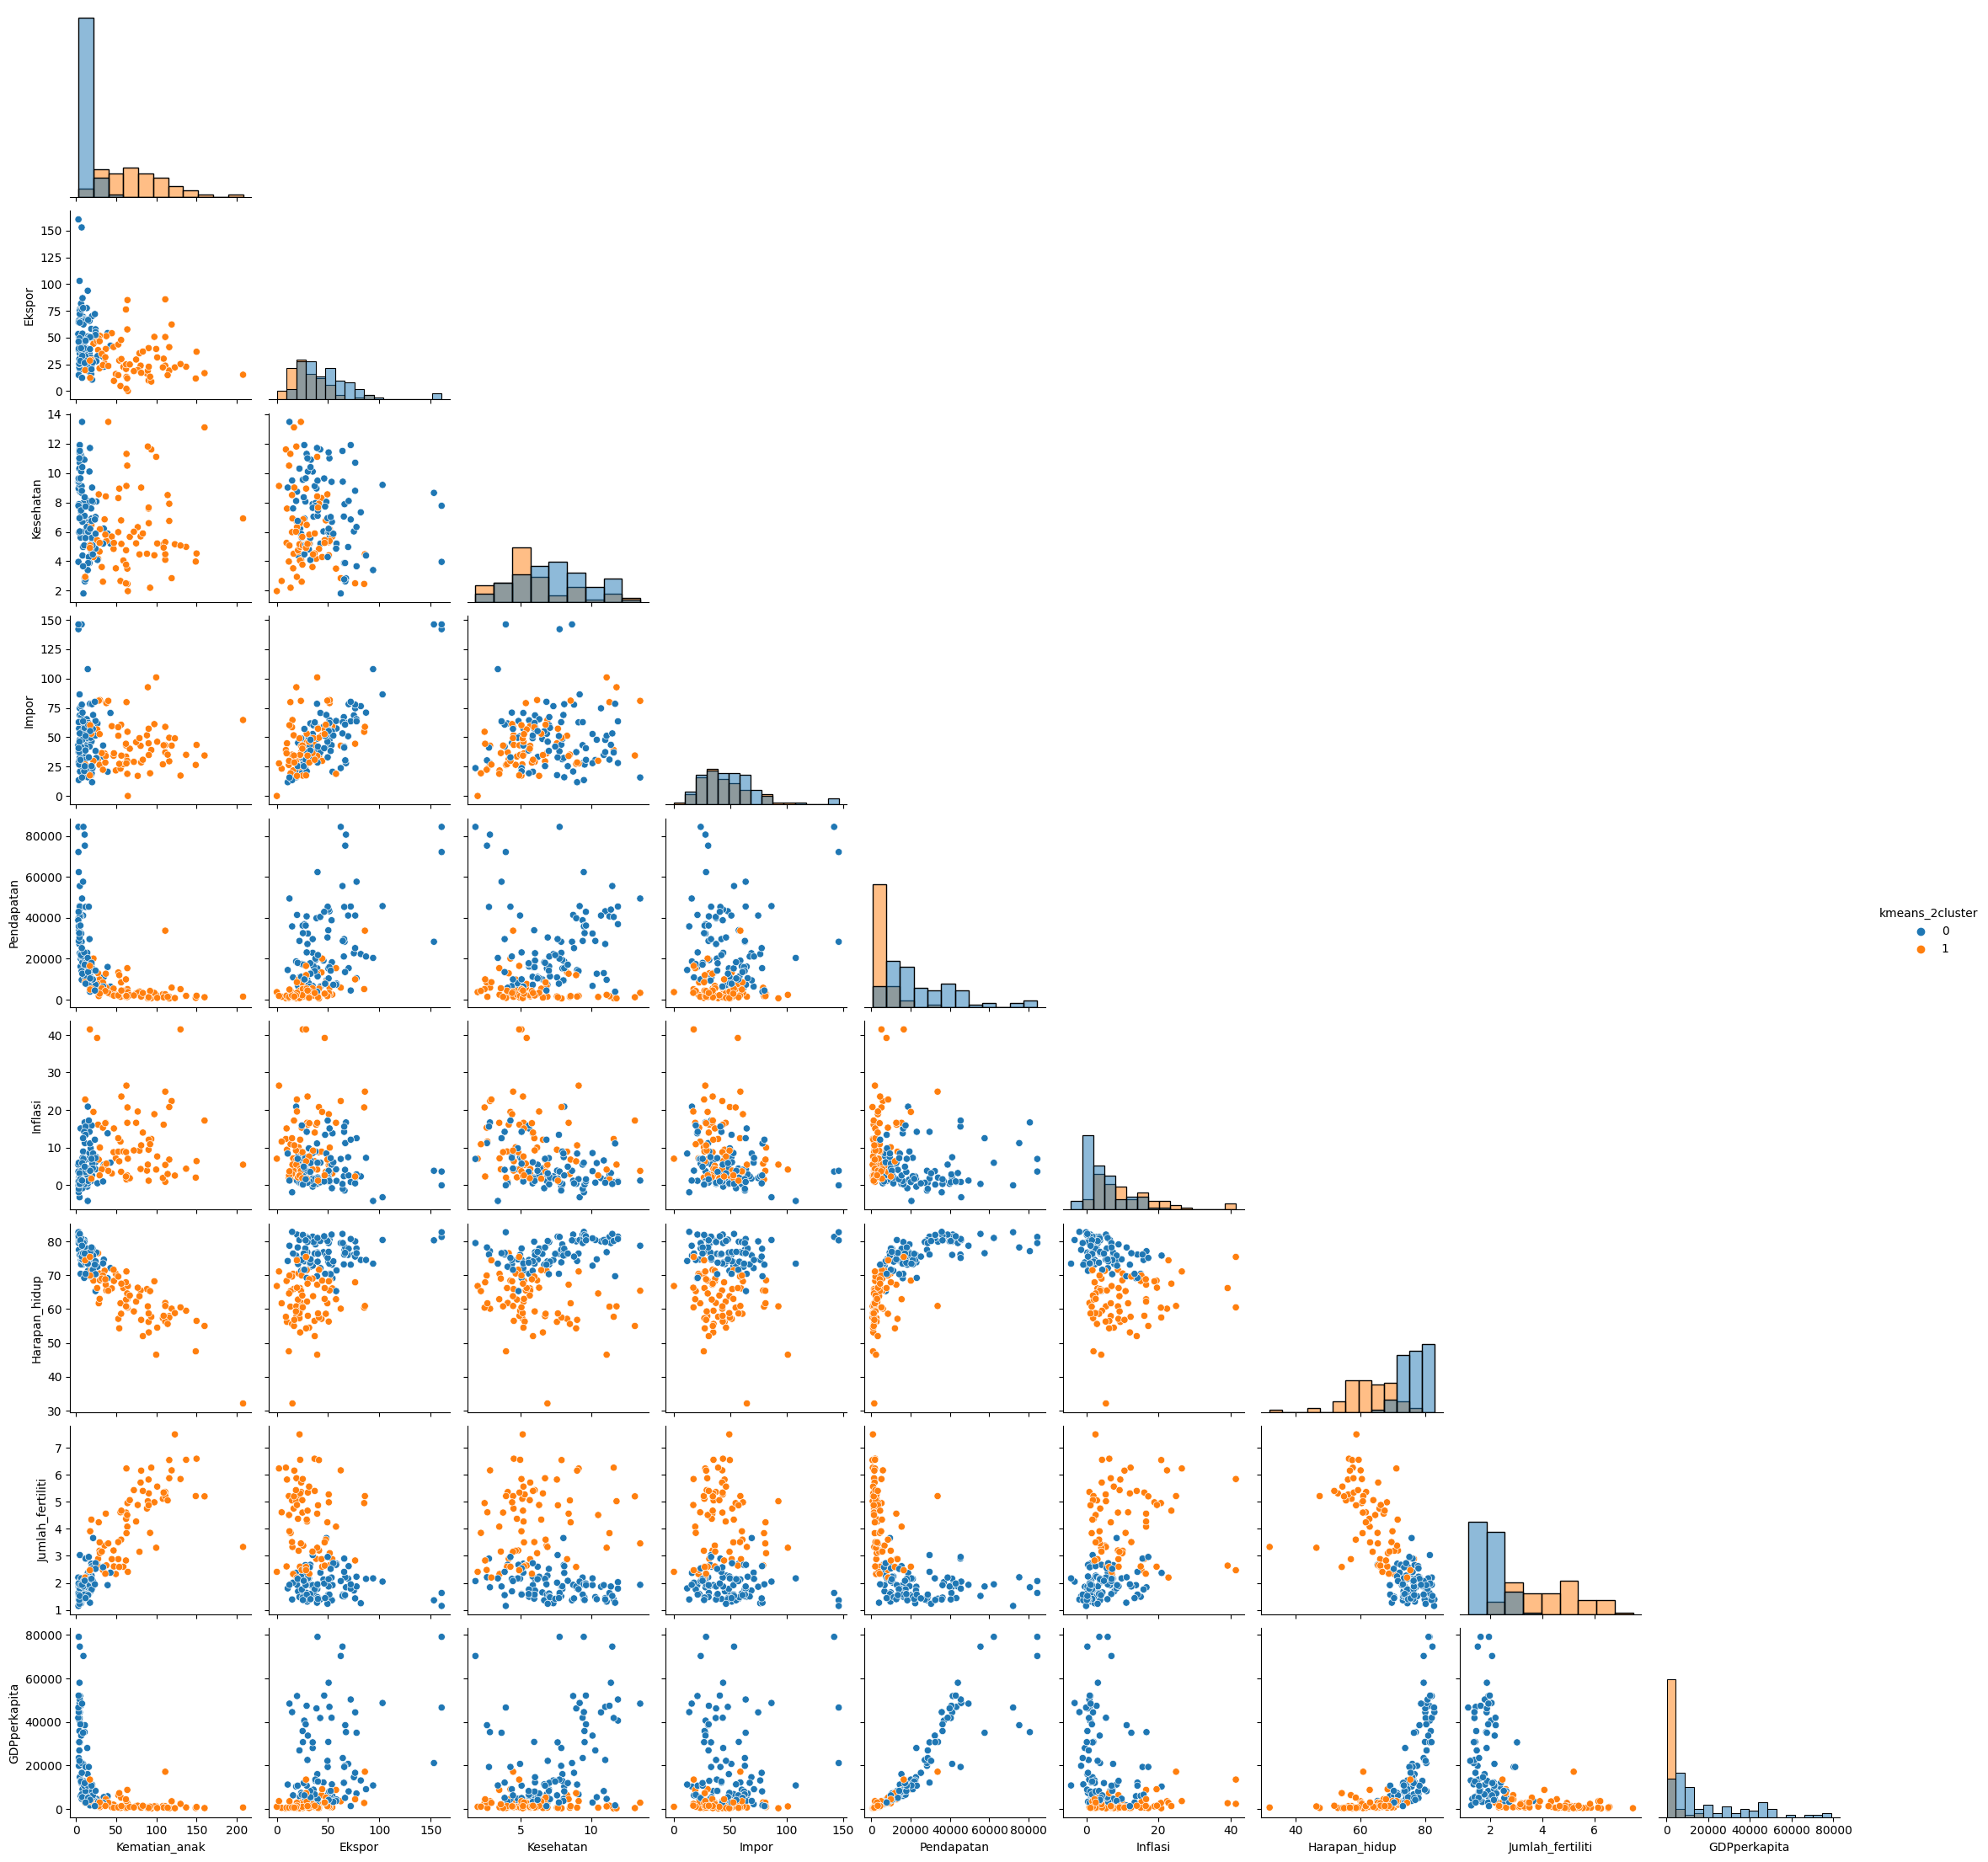

In [36]:
# Visualize the 2-clusters
plt.figure(figsize=(16,20))
g = sns.pairplot(tempdf, hue="kmeans_2cluster", diag_kind="hist", corner=True)
plt.show()


2-Clustering bukanlah pilihan yang baik dan sangat sedikit cluster.

Kita bisa menggunakan elbow method atau the silhouette score method untuk menemukan jumlah cluster terbaik

In [37]:
#Elbow method
def elbowMethod(data, k_min=2, k_max= 10):
    wcss = [] 
    k_range = range(k_min, k_max + 1)

    for i in k_range:
      kmeans_test = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
      kmeans_test.fit(data)
      wcss.append(kmeans_test.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, wcss, marker='o')

    for i, value in enumerate(wcss):
        ax.text(i+2.15, value-0.005, round(value,3))

    plt.axvline(x = 4, color = 'r')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

Elbow Method



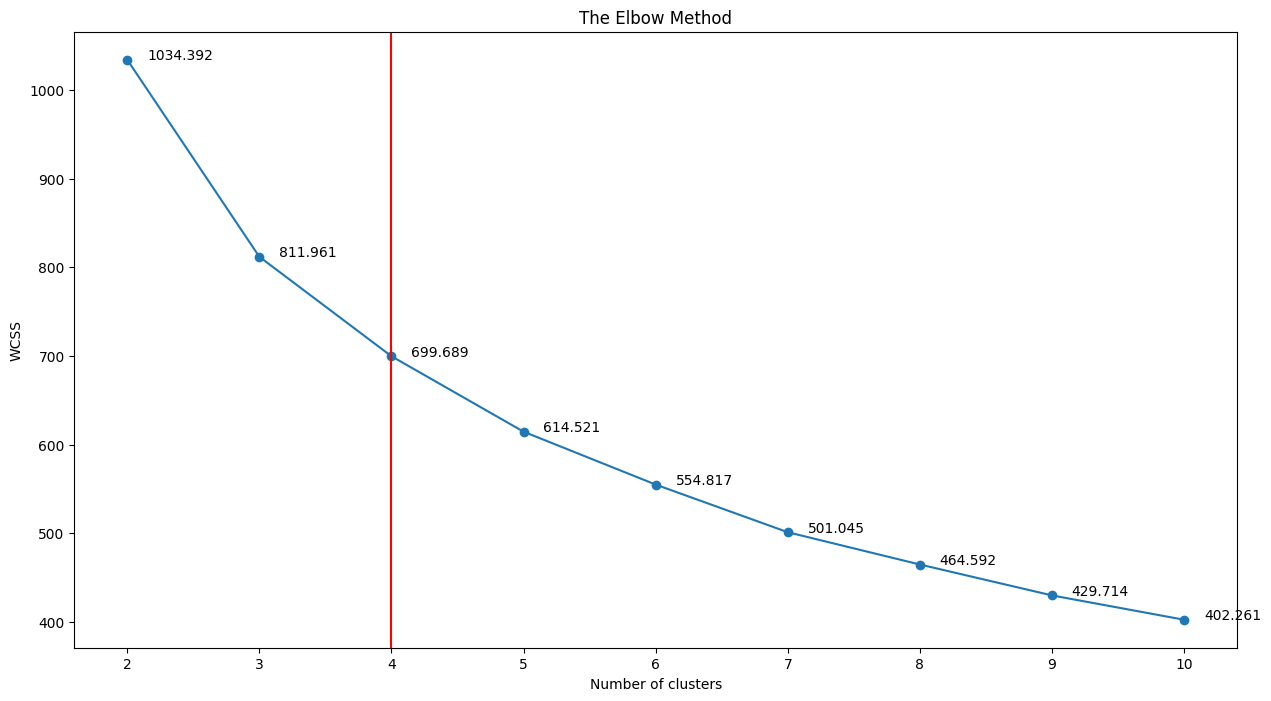

In [38]:
print('Elbow Method')
print()
elbowMethod(scaled_df)

In [42]:
#Silhputte method
def silMethod(data, k_min=2, k_max=10):
    sil_score = []
    k_range = range(k_min, k_max+1)

    for k in k_range:
        model2 = KMeans(n_clusters = k)
        model2.fit(data)
        labels = model2.labels_
        s_score = silhouette_score(data, labels, metric='euclidean')
        sil_score.append(s_score)
        
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, sil_score, marker='o')

    for i, value in enumerate(sil_score):
        ax.text(i+2.15, value-0.005, round(value,3))

    plt.xticks(k_range)
    plt.axvline(x = 4, color = 'r')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

Silhouette Method



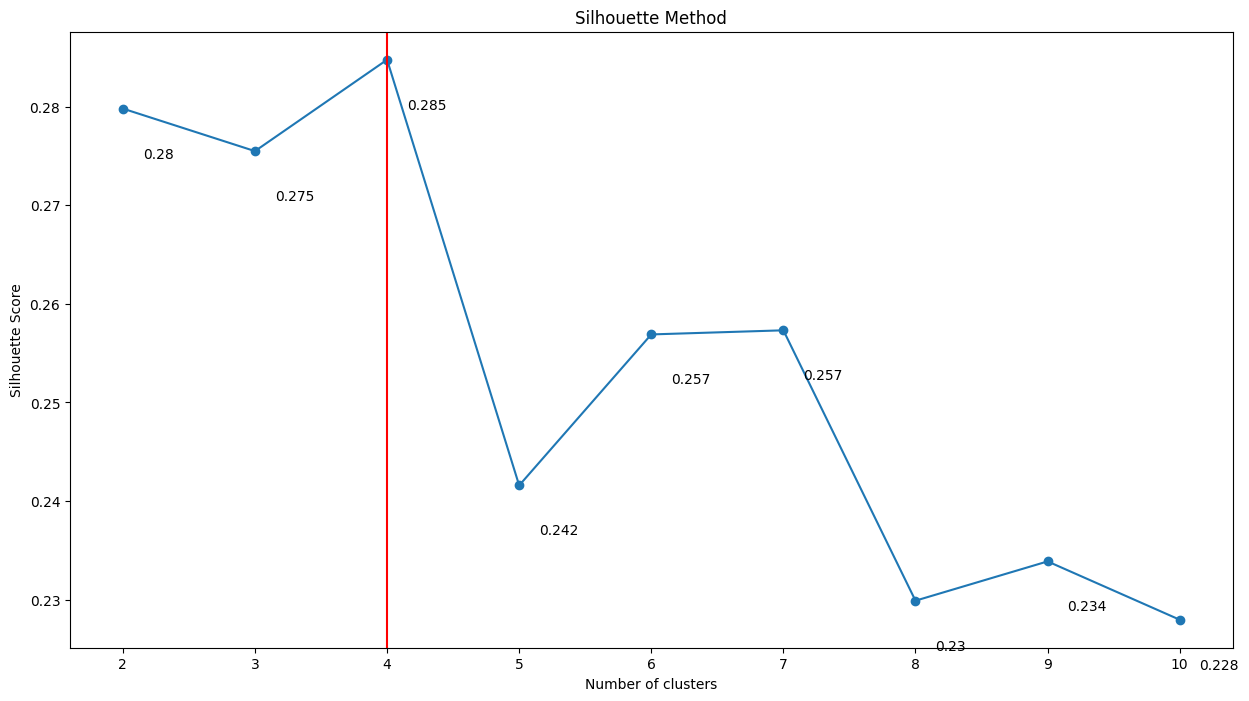

In [43]:
print('Silhouette Method')
print()
silMethod(scaled_df)

Dari hasil perhitungan Elbow Method dan Silhoutte Method didapatkan jumlah cluster terbaik adalah 4 cluster.

Maka Clustering akan dilakukan lagi dengan n = 4

In [70]:
kmeans2 = KMeans(n_clusters = 4, random_state = 42).fit(scaled_df)
labels2 = kmeans2.labels_

In [ ]:
print('n-cluster = 4')
print()
new_df['Cluster'] = labels2
print('Cluster and its countries quantity :')
display(new_df.Cluster.value_counts(ascending=True))
print()
display(new_df.head())

In [46]:
analysis_res = new_df.groupby('Cluster').agg({'mean'})
analysis_res['Banyak_negara'] = new_df.groupby('Cluster')['Negara'].count()
display(analysis_res)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Banyak_negara
,mean,mean,mean,mean,mean,mean,mean,mean,mean,
Cluster,,,,,,,,,,
0,22.138824,40.483400,6.246165,47.247834,12587.882353,7.711788,72.680000,2.309059,6467.200000,85
1,5.212903,44.283871,8.942387,39.103226,42657.225806,2.698806,80.070968,1.780000,41625.419355,31
2,93.841304,28.837174,6.346957,42.128261,3738.978261,10.727891,59.232609,5.054348,1826.130435,46
3,6.200000,134.152000,6.594000,125.732000,50174.800000,-0.005200,79.620000,1.672000,41257.600000,5


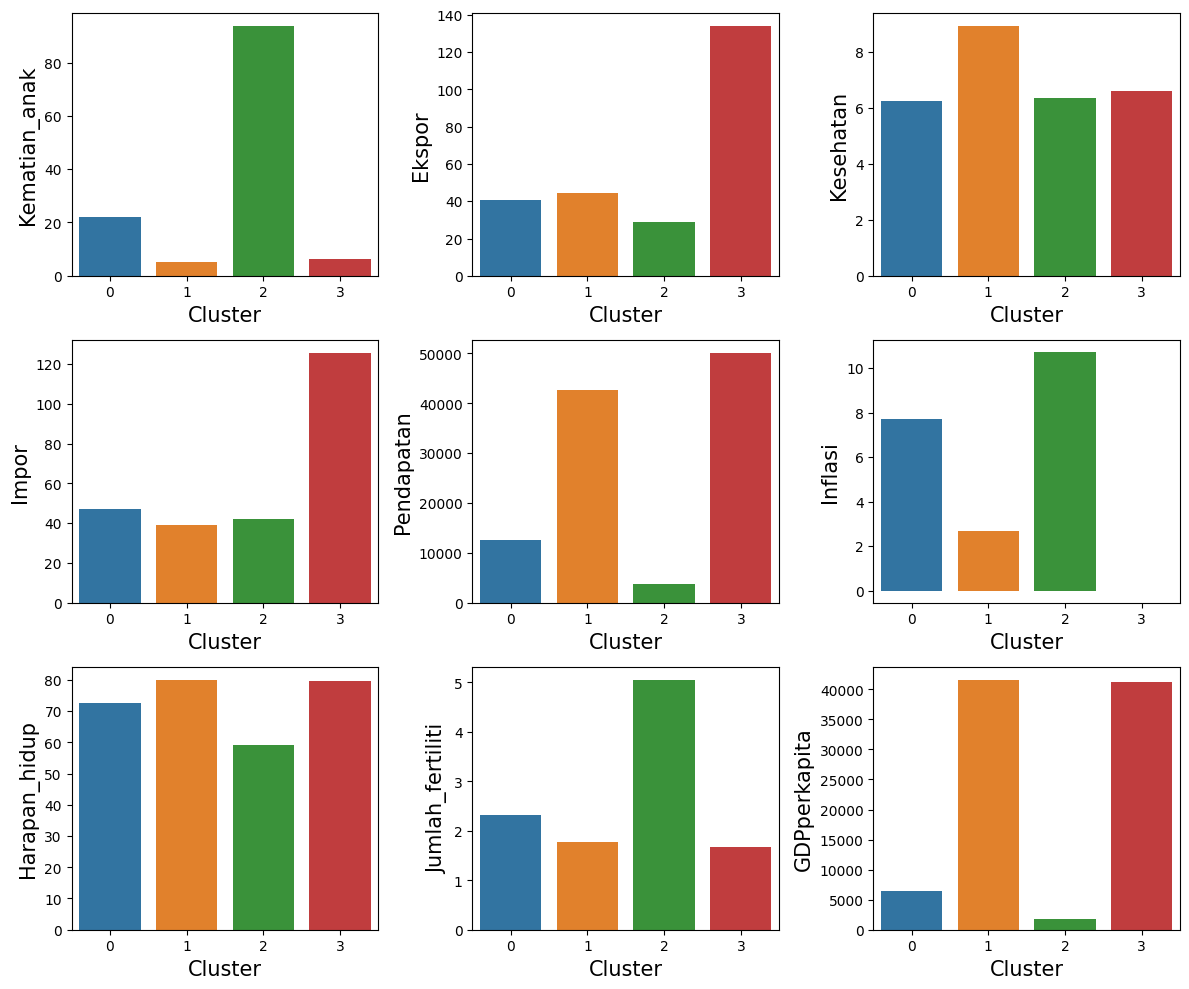

In [72]:
plt.figure(figsize=(12, 10))
for i, var in enumerate(num_df.columns):
    plt.subplot(3,3,i+1)
    sns.barplot(x = analysis_res.reset_index().Cluster, y = analysis_res[var]['mean'])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()    
plt.show()   

Berdasarkan grafik di atas, kita harus mempertimbangkan negara klaster 2 untuk rekomendasi bantuan karena semua fitur data yang mewakili klaster 2 paling dekat dengan karakteristik negara terbelakang yang membutuhkan bantuan keuangan. Berikut adalah alasan mengapa kita harus memilih cluster 2 sebagai pilihan:

- Highest 'Kematian_anak'
- Lowest 'Ekspor'
- Comparatively low 'Kesehatan'
- Comparatively Low 'Impor'
- Lowest 'Pendapatan'
- Highest 'Inflasi'
- Lowest 'Harapan_hidup'
- Highest 'Jumlah_fertiliti'
- Lowest 'GDPperkapita

#Kesimpulan
Dari proses clustering yang telah dilakukan, telah ditentukan cluster mana yang akan direkomendasikan untuk dibantu oleh HELP. Kami menyarankan 10 negara paling terbelakang untuk diberi bantuan.

In [73]:
results = new_df[new_df['Cluster']==2]
results.sort_values(['GDPperkapita','Pendapatan','Kematian_anak','Kesehatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','Impor','Ekspor'], 
                    ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0,2
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.02,327.0,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.54,334.0,2
112,Niger,123.0,22.20,5.16,49.1,814.0,2.55,58.8,7.49,348.0,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220.0,17.20,55.0,5.20,399.0,2
93,Madagascar,62.2,25.00,3.77,43.0,1390.0,8.79,60.8,4.60,413.0,2
106,Mozambique,101.0,31.50,5.21,46.2,918.0,7.64,54.5,5.56,419.0,2
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.01,47.5,5.21,446.0,2
94,Malawi,90.5,22.80,6.59,34.9,1030.0,12.10,53.1,5.31,459.0,2
50,Eritrea,55.2,4.79,2.66,23.3,1420.0,11.60,61.7,4.61,482.0,2


Negara yang akan direkomendasikan untuk diberi bantuan adalah:

1. Burundi
2. Liberia
3. Congo
4. Niger
5. Sierra Leone
6. Madagaskar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea